In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import t

In [2]:
raw_data = pd.read_csv('lending_club_loan_two.csv')
raw_data.head(3)

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   

         emp_title emp_length home_ownership  annual_inc  ... open_acc  \
0        Marketing  10+ years           RENT    117000.0  ...     16.0   
1  Credit analyst     4 years       MORTGAGE     65000.0  ...     17.0   
2     Statistician   < 1 year           RENT     43057.0  ...     13.0   

  pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     0.0   36369.0       41.8      25.0                    w   
1     0.0   20131.0       53.3      27.0                    f   
2     0.0   11987.0       92.2      26.0                    f   

  application_type  mort_acc  pub_rec_bankruptcies  \
0       INDIVIDUAL       0.0                   0.0   
1       INDIVIDUAL       3.0                   0.0   
2       INDIVIDUAL       0.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  

[3 rows x 27 columns]

In [3]:
raw_data.columns.tolist()

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'dti',
 'earliest_cr_line',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'pub_rec_bankruptcies',
 'address']

# 1.2 Data Cleaning

In the dataset,
- **c_variables** represents categorical variables,
- **n_variables** represent numeric variabels

In [4]:
n_variables = raw_data.select_dtypes(include=["number"]).columns.tolist()
raw_data[n_variables].head(4)

loan_amnt  int_rate  installment  annual_inc    dti  open_acc  pub_rec  \
0    10000.0     11.44       329.48    117000.0  26.24      16.0      0.0   
1     8000.0     11.99       265.68     65000.0  22.05      17.0      0.0   
2    15600.0     10.49       506.97     43057.0  12.79      13.0      0.0   
3     7200.0      6.49       220.65     54000.0   2.60       6.0      0.0   

   revol_bal  revol_util  total_acc  mort_acc  pub_rec_bankruptcies  
0    36369.0        41.8       25.0       0.0                   0.0  
1    20131.0        53.3       27.0       3.0                   0.0  
2    11987.0        92.2       26.0       0.0                   0.0  
3     5472.0        21.5       13.0       0.0                   0.0

- from numerical variables, we'll drop  mort_acc, revol_bal, mort_acc.

In [5]:
drop_num_var = ['mort_acc', 'revol_bal']

In [6]:
c_variables = raw_data.select_dtypes(include=["object"]).columns.tolist()
raw_data[c_variables].head(4)

term grade sub_grade        emp_title emp_length home_ownership  \
0   36 months     B        B4        Marketing  10+ years           RENT   
1   36 months     B        B5  Credit analyst     4 years       MORTGAGE   
2   36 months     B        B3     Statistician   < 1 year           RENT   
3   36 months     A        A2  Client Advocate    6 years           RENT   

  verification_status   issue_d loan_status             purpose  \
0        Not Verified  Jan-2015  Fully Paid            vacation   
1        Not Verified  Jan-2015  Fully Paid  debt_consolidation   
2     Source Verified  Jan-2015  Fully Paid         credit_card   
3        Not Verified  Nov-2014  Fully Paid         credit_card   

                     title earliest_cr_line initial_list_status  \
0                 Vacation         Jun-1990                   w   
1       Debt consolidation         Jul-2004                   f   
2  Credit card refinancing         Aug-2007                   f   
3  Credit card refinancing         Sep-2006                   f   

  application_type                                            address  
0       INDIVIDUAL     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1       INDIVIDUAL  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2       INDIVIDUAL  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3       INDIVIDUAL            823 Reid Ford\r\nDelacruzside, MA 00813

- from categorical variables, we'll drop emp_title, emp_length, issue_d, title, earliest_cr_line, initial_list_status and address.

In [7]:
drop_cat_var = ['grade','emp_title', 'emp_length', 'issue_d', 
                'title', 'earliest_cr_line', 'initial_list_status', 
                'address', 'application_type']

In [8]:
drop_col = drop_num_var + drop_cat_var #add 2 lists of numeric and categorical variables together
drop_col 

['mort_acc',
 'revol_bal',
 'grade',
 'emp_title',
 'emp_length',
 'issue_d',
 'title',
 'earliest_cr_line',
 'initial_list_status',
 'address',
 'application_type']

In [9]:
data_initial = raw_data.drop(labels=drop_col, axis=1) #data with columns we'd like to look at
data_initial.head(4)

loan_amnt        term  int_rate  installment sub_grade home_ownership  \
0    10000.0   36 months     11.44       329.48        B4           RENT   
1     8000.0   36 months     11.99       265.68        B5       MORTGAGE   
2    15600.0   36 months     10.49       506.97        B3           RENT   
3     7200.0   36 months      6.49       220.65        A2           RENT   

   annual_inc verification_status loan_status             purpose    dti  \
0    117000.0        Not Verified  Fully Paid            vacation  26.24   
1     65000.0        Not Verified  Fully Paid  debt_consolidation  22.05   
2     43057.0     Source Verified  Fully Paid         credit_card  12.79   
3     54000.0        Not Verified  Fully Paid         credit_card   2.60   

   open_acc  pub_rec  revol_util  total_acc  pub_rec_bankruptcies  
0      16.0      0.0        41.8       25.0                   0.0  
1      17.0      0.0        53.3       27.0                   0.0  
2      13.0      0.0        92.2       26.0                   0.0  
3       6.0      0.0        21.5       13.0                   0.0

In [10]:
data_initial.isnull().sum() / len(data_initial) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_util              0.069692
total_acc               0.000000
pub_rec_bankruptcies    0.135091
dtype: float64

Here, we can see that the sum of null values in the dataset is not significant, with revolving utility and public record bankruptcies having null values equating to **less than 0.15% each** of the entire dataset. 

Thus, we can remove this values from the dataset.

In [11]:
data_initial.dropna(inplace=True) #removes NaN values from data, does not create a new dataset

In [12]:
data_initial.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

Now, let's check the description of 

In [13]:
c_var = data_initial.select_dtypes(include=["object"])
c_var.head(3)

term sub_grade home_ownership verification_status loan_status  \
0   36 months        B4           RENT        Not Verified  Fully Paid   
1   36 months        B5       MORTGAGE        Not Verified  Fully Paid   
2   36 months        B3           RENT     Source Verified  Fully Paid   

              purpose  
0            vacation  
1  debt_consolidation  
2         credit_card

In [14]:
n_var = data_initial.select_dtypes(include=["number"])
n_var.head(3)

loan_amnt  int_rate  installment  annual_inc    dti  open_acc  pub_rec  \
0    10000.0     11.44       329.48    117000.0  26.24      16.0      0.0   
1     8000.0     11.99       265.68     65000.0  22.05      17.0      0.0   
2    15600.0     10.49       506.97     43057.0  12.79      13.0      0.0   

   revol_util  total_acc  pub_rec_bankruptcies  
0        41.8       25.0                   0.0  
1        53.3       27.0                   0.0  
2        92.2       26.0                   0.0

- Now, lets take a look at the numeric variables!

In [15]:
numeric_describe = pd.DataFrame({
    
    'loan_amnt' : data_initial['loan_amnt'].describe(),
    'int_rate' : data_initial['int_rate'].describe(),
    'installment' : data_initial['installment'].describe(),
    'annual_inc' : data_initial['annual_inc'].describe(),
    'dti' : data_initial['dti'].describe(),
    'pub_rec' : data_initial['pub_rec'].describe(),
    'revol_util' : data_initial['revol_util'].describe(),
    'total_acc' : data_initial['total_acc'].describe(),
    'pub_rec_bankruptcies' : data_initial['pub_rec_bankruptcies'].describe()
})

In [16]:
pd.options.display.float_format = '{:.2f}'.format
numeric_describe

loan_amnt  int_rate  installment  annual_inc       dti   pub_rec  \
count  395219.00 395219.00    395219.00   395219.00 395219.00 395219.00   
mean    14122.06     13.64       432.07    74199.37     17.39      0.18   
std      8357.05      4.47       250.70    61557.25     18.03      0.53   
min       500.00      5.32        16.08        0.00      0.00      0.00   
25%      8000.00     10.49       250.33    45000.00     11.30      0.00   
50%     12000.00     13.33       375.49    64000.00     16.92      0.00   
75%     20000.00     16.55       567.79    90000.00     22.99      0.00   
max     40000.00     30.99      1533.81  8706582.00   9999.00     86.00   

       revol_util  total_acc  pub_rec_bankruptcies  
count   395219.00  395219.00             395219.00  
mean        53.81      25.43                  0.12  
std         24.44      11.89                  0.36  
min          0.00       2.00                  0.00  
25%         35.90      17.00                  0.00  
50%         54.80      24.00                  0.00  
75%         72.90      32.00                  0.00  
max        892.30     151.00                  8.00

- As we can observe here, the maximum values for *annual income, and total_acc* is way higher than their 75th percentile values.   
 
 
 
- Thus, let's observe only the values that are within a a 1.5 Inter-quartile-range of the 25th and 75th percentile. That is: (25th - 1.5xIQR , 75th + 1.5xIQ)

In [17]:
data_initial.shape

(395219, 16)

In [18]:
#lets add our dti range

dti_25 = data_initial['dti'].quantile(q=0.25) #25th percentile
dti_75 = data_initial['dti'].quantile(q=0.75) #75th percentile
iqr_dti = dti_75 - dti_25

dti_lower = dti_25 - 1.5*iqr_dti #debt to income ratio lower limit
dti_upper = dti_75 + 1.5*iqr_dti #debt to income ratio upper limit

dti_range = (data_initial['dti'] <= dti_upper) & (data_initial['dti'] >= dti_lower)

In [19]:
data = data_initial[dti_range] #remove unwanted dti
data.shape

(394944, 16)

In [20]:
#lets remove unwanted total account values from the dataset

total_acc_25 = data_initial['total_acc'].quantile(q=0.25) #25th percentile
total_acc_75 = data_initial['total_acc'].quantile(q=0.75) #75th percentile
iqr_total_acc = total_acc_75 - total_acc_25

total_acc_lower = total_acc_25 - 1.5*iqr_total_acc #total accounts lower limit
total_acc_upper = total_acc_75 + 1.5*iqr_total_acc #total accounts upper limit

total_acc_range = (data_initial['total_acc'] <= total_acc_upper) & (data_initial['total_acc'] >= total_acc_lower)

In [21]:
data = data_initial[dti_range & total_acc_range] #remove unwanted dti and total accounts
data.shape

(386462, 16)

In [22]:
#lets add our annual income range

annual_inc_25 = data_initial['annual_inc'].quantile(q=0.25) #25th percentile
annual_inc_75 = data_initial['annual_inc'].quantile(q=0.75) #75th percentile
iqr_annual_inc = annual_inc_75 - annual_inc_25

annual_inc_lower = annual_inc_25 - 1.5*iqr_annual_inc #debt to income ratio lower limit
annual_inc_upper = annual_inc_75 + 1.5*iqr_annual_inc #debt to income ratio upper limit

annual_inc_range = (data_initial['annual_inc'] <= annual_inc_upper) & (data_initial['annual_inc'] >= annual_inc_lower)

In [23]:
data = data_initial[dti_range & annual_inc_range & total_acc_range] #remove unwanted dti, total_acc & annual_inc
data.shape

(370708, 16)

In [24]:
data['home_ownership'].value_counts() 

MORTGAGE    181596
RENT        153636
OWN          35340
OTHER          104
NONE            29
ANY              3
Name: home_ownership, dtype: int64

- we should drop the "ANY" house data since its inconclusive

In [25]:
data = data.loc[data['home_ownership'] != 'ANY']
data.shape

(370705, 16)

- Now, we've reduced the data set from **396,030** entries to **370,705** entries. which is quite a good sample since:

In [26]:
x = 370705/ 396030 * 100
print('The size of our sample is ' + '{0:.2f}%'.format(x) + ' of the entire dataframe!')

The size of our sample is 93.61% of the entire dataframe!


# Now we're done pre-processing our data!

# 2 Data Analysis

In [27]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [28]:
data['term'].value_counts()

 36 months    283612
 60 months     87093
Name: term, dtype: int64

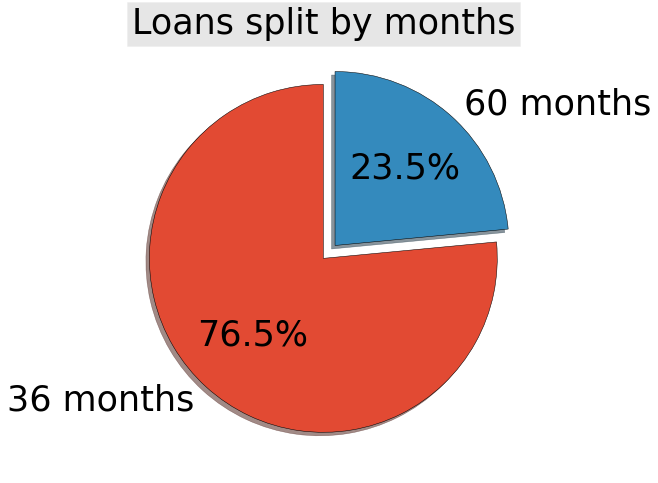

In [29]:
labels = ['36 months', '60 months']
explode = [0, 0.1]

plt.figure(figsize=(8,8))

plt.style.use("ggplot")
plt.pie(data['term'].value_counts(),
        labels=labels,
       wedgeprops={'edgecolor' : 'black'},
        explode=explode,
       shadow=True,
       startangle=90,
       autopct='%1.1f%%', textprops = { "fontsize" : 35 })

plt.title('Loans split by months', bbox={'facecolor':'0.9', 'pad':5}, fontsize = 35) #increase font size!

plt.show()

Lets look at the loan status of the loans in the dataset, split by their loan terms!

In [30]:
months_36 = data.loc[data['term'] == ' 36 months']
months_60 = data.loc[data['term'] == ' 60 months']

In [31]:
months_36['loan_status'].value_counts()

Fully Paid     238301
Charged Off     45311
Name: loan_status, dtype: int64

In [32]:
months_60['loan_status'].value_counts()

Fully Paid     58838
Charged Off    28255
Name: loan_status, dtype: int64

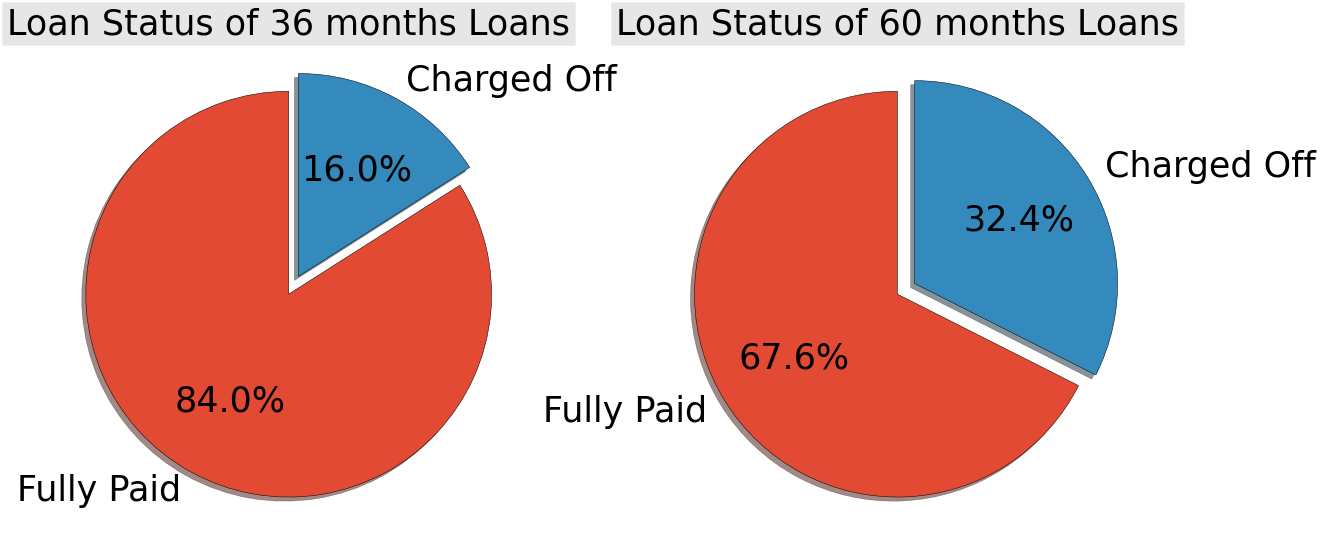

In [33]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20)) #ax1,ax2 refer to two pies

labels = ['Fully Paid', 'Charged Off']
explode = [0, 0.1]

plt.style.use("ggplot")

ax1.pie(months_36['loan_status'].value_counts(),
        labels=labels,
       wedgeprops={'edgecolor' : 'black'},
        explode=explode,
       shadow=True,
       startangle=90,
       autopct='%1.1f%%', textprops = { "fontsize" : 35 })

ax1.set_title("Loan Status of 36 months Loans", bbox={'facecolor':'0.9', 'pad':5}, fontsize = 35)

ax2.pie(months_60['loan_status'].value_counts(),
        labels=labels,
       wedgeprops={'edgecolor' : 'black'},
        explode=explode,
       shadow=True,
       startangle=90,
       autopct='%1.1f%%', textprops = { "fontsize" : 35 })

ax2.set_title("Loan Status of 60 months Loans",bbox={'facecolor':'0.9', 'pad':5}, fontsize = 35 )

plt.show()

###  Results show that longer term loans have double the proportion of loans being charged off. Hence, our team has chosen to focus our analysis on the 60 month loans

# Numeric Variables

# 2.1 Debt to Income Ratio

In [34]:
co = data[data['loan_status'] == 'Charged Off']
fp = data[data['loan_status'] == 'Fully Paid']

co_36 = months_36[months_36['loan_status'] == 'Charged Off']
co_60 = months_60[months_60['loan_status'] == 'Charged Off']

fp_36 = months_36[months_36['loan_status'] == 'Fully Paid']
fp_60 = months_60[months_60['loan_status'] == 'Fully Paid']

In [35]:
def bins(x_lower, x_upper, bins):
    
    """ This function manually returns bins of a variable of length 'bins' """
    
    b = ((x_upper - x_lower + 1) / bins ) #b is the interval of the bins

    bins_list = []
    for i in range(bins+1):
    
        x = x_lower

        x += ( i * b )
    
        if x >= x_upper:
            break
        else:
            bins_list.append(x)
            
        a = np.around(bins_list, 2)
        
    return a

In [36]:
dti_60_bins = bins(x_lower=co_60['dti'].min(), x_upper=co_60['dti'].max(), bins=25)

dti_60_bins

array([ 0.  ,  1.66,  3.32,  4.98,  6.64,  8.3 ,  9.96, 11.62, 13.28,
       14.94, 16.6 , 18.26, 19.92, 21.58, 23.24, 24.9 , 26.56, 28.22,
       29.88, 31.54, 33.2 , 34.86, 36.52, 38.18, 39.84])

In [37]:
def co_bins_portion(bins, data, variable, co_data):
    
    """This function returns percentage of charged off loans based on bins of a parameter of the bins"""
    
    dti_co = []
    
    for index in range(len(bins)):
    
        if index == (len(bins) - 1):
            break       
    
        else:
            range_dti = (data[variable] >= bins[index]) & (data[variable] <= bins[index + 1])
            x = len(co_data.loc[range_dti, variable]) / len(data.loc[range_dti, variable]) * 100
    
        dti_co.append(x)
    
        co_dti = [round(num, 2) for num in dti_co]

    return np.array(co_dti)

In [38]:
#Percentage of 60 months charged off loans based on bins of dti
co_60_dti = co_bins_portion(bins=dti_60_bins, data=months_60, 
                variable='dti', co_data=co_60)
co_60_dti

array([23.57, 20.51, 24.39, 23.57, 24.33, 25.37, 26.15, 27.86, 27.26,
       28.65, 30.32, 32.27, 33.33, 34.99, 36.4 , 37.43, 40.76, 41.22,
       43.09, 44.42, 45.44, 48.88, 52.37, 51.92])

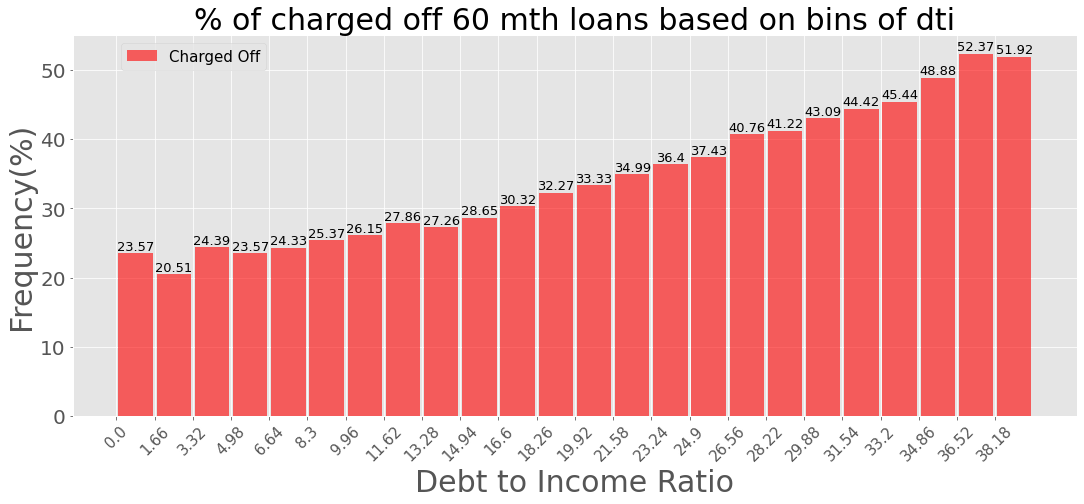

In [39]:
x = np.arange(len(dti_60_bins)-1)  # the label locations
space = 0.22# the width of the bars
width = 0.9
y = np.array(co_60_dti)

plt.figure(figsize=(18,7))

plt.bar(x, y, color='r', width=width, alpha=0.6, label='Charged Off')

plt.xticks(x-0.5, dti_60_bins[:-1], fontsize=15, rotation=45)
plt.yticks(fontsize = 20)
plt.legend(fontsize=15,bbox_to_anchor=(0.2, 1.0))
plt.title('% of charged off 60 mth loans based on bins of dti', fontsize=30)

for i in range(len(y)):
    plt.text(i, y[i], y[i], ha='center', va='bottom', fontsize=13)

plt.ylabel('Frequency(%)',fontsize=30)
plt.xlabel('Debt to Income Ratio',fontsize=30)
plt.show()

# DTI Recommendation 

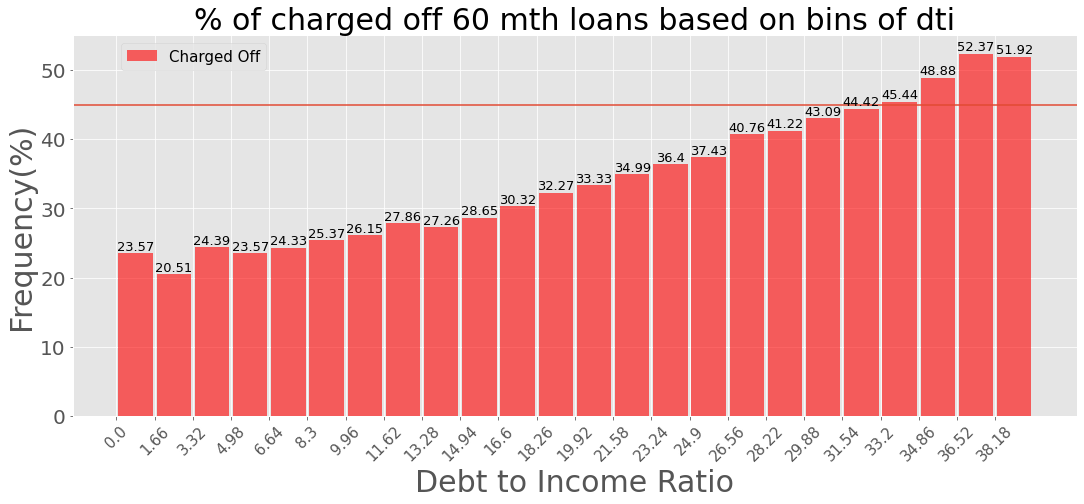

In [40]:
x = np.arange(len(dti_60_bins)-1)  # the label locations
space = 0.22# the width of the bars
width = 0.9
y = np.array(co_60_dti)

plt.figure(figsize=(18,7))

plt.bar(x, y, color='r', width=width, alpha=0.6, label='Charged Off')

plt.xticks(x-0.5, dti_60_bins[:-1], fontsize=15, rotation=45)
plt.yticks(fontsize = 20)
plt.legend(fontsize=15,bbox_to_anchor=(0.2, 1.0))
plt.title('% of charged off 60 mth loans based on bins of dti', fontsize=30)

for i in range(len(y)):
    plt.text(i, y[i], y[i], ha='center', va='bottom', fontsize=13)

plt.ylabel('Frequency(%)',fontsize=30)
plt.xlabel('Debt to Income Ratio',fontsize=30)
plt.axhline(y=45)
plt.show()

# 2.2 Open Accounts

In [41]:
np.sort(data['open_acc'].unique()) #number of open accounts

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45.])

In [42]:
open_acc_valuecount = data['open_acc'].value_counts().sort_index()
#number of open accounts in data set

In [43]:
open_acc_co_valuecount = co['open_acc'].value_counts().sort_index()
#order of percentage of charged off loans in ascending order of percentage

In [44]:
open_acc_co = (np.around(open_acc_co_valuecount / open_acc_valuecount, 2) * 100).fillna(0)
#percentage of charged off loans based on number of open accounts

In [45]:
acc_bins = bins(x_lower=co['open_acc'].min(), x_upper=co['open_acc'].max(), bins=9)
acc_bins #bins of number of open accounts

array([ 1.,  6., 11., 16., 21., 26., 31., 36., 41.])

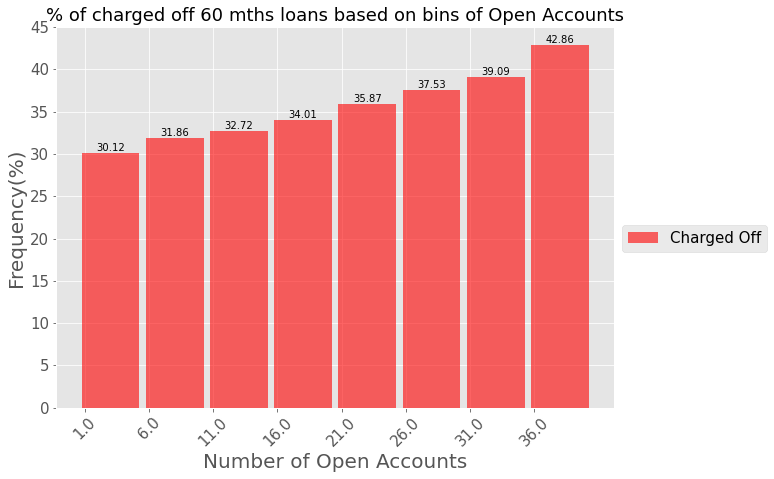

In [46]:
open_acc_valuecount_60 = months_60['open_acc'].value_counts().sort_index()
open_acc_co_valuecount_60 = co_60['open_acc'].value_counts().sort_index()
open_acc_co_60 = (np.around(open_acc_co_valuecount_60 / open_acc_valuecount_60, 2) * 100).fillna(0)
acc_bins_60 = np.around(bins(x_lower=co_60['open_acc'].min(), x_upper=co_60['open_acc'].max(), bins=9),0)
y_no_bankruptcy_60 = co_bins_portion(acc_bins_60, months_60, 'open_acc', co_60) 


x = np.arange(len(acc_bins_60)-1)  # the label locations
space = 0.22# the width of the bars
width = 0.9
y = np.array(y_no_bankruptcy_60)

plt.figure(figsize=(10,7))

plt.bar(x, y, color='r', width=width, alpha=0.6, label='Charged Off') 
#plots graph of percentage of charged off loans based on bins of number of open accounts

plt.xticks(x-0.4, acc_bins[:-1], fontsize=15, rotation=45)
plt.yticks(fontsize = 15)
plt.legend(fontsize=15,bbox_to_anchor=(1, 0.5))
plt.title('% of charged off 60 mths loans based on bins of Open Accounts', fontsize=18)

for i in range(len(y)):
    plt.text(i, y[i], y[i], ha='center', va='bottom', fontsize=10)
    
plt.ylim(0,45)
plt.ylabel('Frequency(%)',fontsize=20)
plt.xlabel('Number of Open Accounts',fontsize=20)
plt.show()

# 2.3 Annual Income

In [47]:
inc_bins = np.around(bins(x_lower=co['annual_inc'].min(), x_upper=co['annual_inc'].max(), bins=25), 0)
inc_bins

array([  4000.,  10140.,  16280.,  22420.,  28560.,  34700.,  40840.,
        46980.,  53120.,  59260.,  65400.,  71540.,  77680.,  83821.,
        89961.,  96101., 102241., 108381., 114521., 120661., 126801.,
       132941., 139081., 145221., 151361.])

In [48]:
inc_bins_60 = np.around(bins(x_lower=co_60['annual_inc'].min(), x_upper=co_60['annual_inc'].max(), bins=25), 0)
#annual inc bins for 60 months loans


In [49]:
co_bins_portion(bins=inc_bins_60, data=months_60, variable='annual_inc', co_data=co_60)

array([38.46, 37.18, 35.19, 42.13, 43.1 , 41.53, 40.07, 36.24, 35.4 ,
       34.44, 31.83, 29.84, 29.64, 28.08, 26.39, 26.95, 25.38, 24.09,
       27.56, 24.77, 24.13, 21.29, 24.03, 24.93])

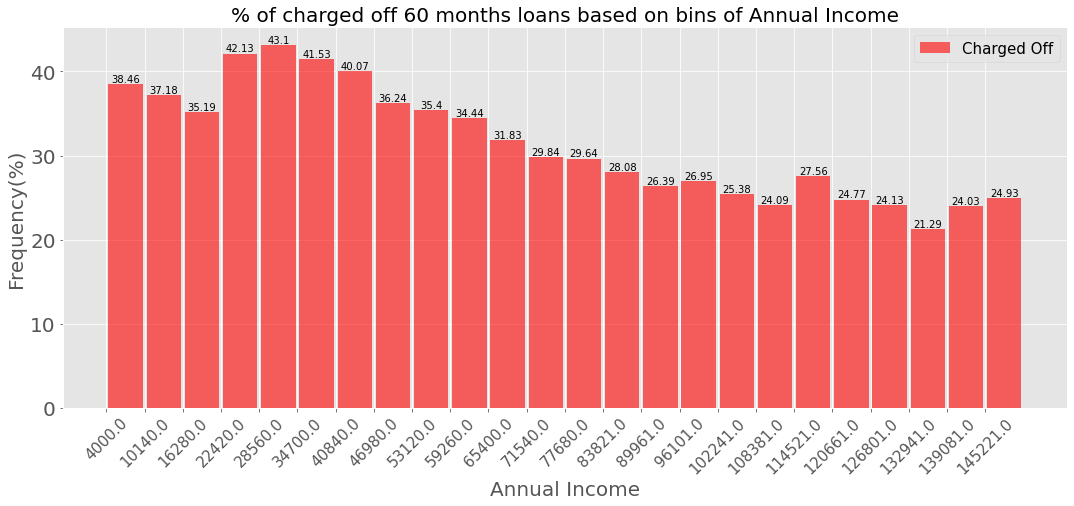

In [50]:
#Percentage of charged off loans based on bins of annual income for 60 months loans
co_ann_inc_60 = co_bins_portion(bins=inc_bins_60, data=months_60, variable='annual_inc', co_data=co_60)


#plot graph for 60 months loans
x = np.arange(len(inc_bins_60)-1)  # the label locations
space = 0.22# the width of the bars
width = 0.9
y = np.array(co_ann_inc_60)

plt.figure(figsize=(18,7))

plt.bar(x, y, color='r', width=width, alpha=0.6, label='Charged Off')

plt.xticks(x-0.5, inc_bins[:-1], fontsize=15, rotation=45)
plt.yticks(fontsize = 20)
plt.legend(fontsize=15,bbox_to_anchor=(1.0, 1.0))
plt.title('% of charged off 60 months loans based on bins of Annual Income', fontsize=20)

for i in range(len(y)):
    plt.text(i, y[i], y[i], ha='center', va='bottom', fontsize=10)

plt.ylabel('Frequency(%)',fontsize=20)
plt.xlabel('Annual Income',fontsize=20) #convert to whole numbers
plt.show()

# 2.4 purpose

## group up purposes:
- events = ['wedding', 'vacation', 'other']
- necessity = ['medical', 'educational']
- home_related = ['home_improvement', 'house', 'moving', 'car']
- business_related = ['renewable_energy', 'major_purchase', 'small_business' ]
- home = ['house', 'moving', 'home_improvement', 'car']

In [51]:
co = data[data['loan_status'] == 'Charged Off']
fp = data[data['loan_status'] == 'Fully Paid']

In [52]:
purpose_fp_order = np.array(fp['purpose'].value_counts().index) 
#order of value counts

In [53]:
purpose_fp = (np.around(fp['purpose'].value_counts()[purpose_fp_order]
                        / data['purpose'].value_counts()[purpose_fp_order], 2)* 100).sort_values()
#percentage of fully paid loans in order of purpose

In [54]:
purpose_co = np.around( 100 - purpose_fp, 2) 
#percentage of charged of loans in order of purpose

In [55]:
debt = (data['purpose'] == 'debt_consolidation') | (data['purpose'] == 'credit_card')

events = ((data['purpose'] == 'wedding') | (data['purpose'] == 'vacation') | (data['purpose'] == 'other'))

necessity = ((data['purpose'] == 'medical') | (data['purpose'] == 'educational'))

business_related = ((data['purpose'] == 'renewable_energy') | (data['purpose'] == 'major_purchase') 
                            | (data['purpose'] == 'small_business'))
                            
house = ((data['purpose'] == 'house') & (data['purpose'] == 'moving') 
                            | (data['purpose'] == 'home_improvement') | (data['purpose'] == 'car'))

In [56]:
charged_off =  data['loan_status'] == 'Charged Off'

co_debt = data.loc[debt & charged_off]
#charged off debt purpose

co_events = data.loc[events & charged_off]
#charged off events purpose

co_necessity = data.loc[necessity & charged_off]
#charged off necessity purpose

co_business_related = data.loc[business_related & charged_off]
#charged off business related purpose

co_house = data.loc[house & charged_off]
#charged off house purpose

In [57]:
#bins of annual income for debt purpose
debt_inc_bins = np.rint(bins(x_lower=co_debt['annual_inc'].min(),
                                 x_upper=co_debt['annual_inc'].max(), bins=25))

#bins of annual income for events purpose
events_inc_bins = np.rint(bins(x_lower=co_events['annual_inc'].min(), 
                                 x_upper=co_events['annual_inc'].max(), bins=25))

#bins of annual income for necessity purpose
necessity_inc_bins = np.rint(bins(x_lower=co_necessity['annual_inc'].min(), 
                                 x_upper=co_necessity['annual_inc'].max(), bins=25))

#bins of annual income for business related purpose
business_related_inc_bins = np.rint(bins(x_lower=co_business_related['annual_inc'].min(), 
                                 x_upper=co_business_related['annual_inc'].max(), bins=25))

#bins of annual income for house purpose
house_inc_bins = np.rint(bins(x_lower=co_house['annual_inc'].min(), 
                                 x_upper=co_house['annual_inc'].max(), bins=25))

In [58]:
y_debt = co_bins_portion(debt_inc_bins, data[debt], 'annual_inc', co_debt) 
#% of charged off loans for debt purpose based on bins of annual income

y_events = co_bins_portion(events_inc_bins, data[events], 'annual_inc', co_events) 
#% of charged off loans for events purpose based on bins of annual income

y_necessity = co_bins_portion(necessity_inc_bins, data[necessity], 'annual_inc', co_necessity) 
#% of charged off loans for necessity purpose based on bins of annual income

y_business_related = co_bins_portion(business_related_inc_bins, data[business_related], 'annual_inc', co_business_related) 
#% of charged off loans for business related purpose based on bins of annual income

y_house = co_bins_portion(house_inc_bins, data[house], 'annual_inc', co_house) 
#% of charged off loans for house purpose based on bins of annual income

In [59]:
def home_inc(inc_bins, y_axis, title):
    
    """This function creates a bar graph of charged off loans based on bins of annual income"""
    
    x = np.arange(len(inc_bins)-1)  # the label locations
    space = 0.22# the width of the bars
    width = 0.9
    y = np.array(y_axis)
    plt.figure(figsize=(15,5))
    plt.bar(x, y, color='r', width=width, alpha=0.6, label='Charged Off')
    
    plt.xticks(x-0.5, inc_bins[:-1], fontsize=20, rotation=45)
    plt.yticks(fontsize = 20)
    plt.legend(fontsize=20,bbox_to_anchor=(1, 1.05))
    plt.title(title, fontsize=20)

    for i in range(len(y)):
        plt.text(i, y[i], y[i], ha='center', va='bottom', fontsize=10)

    plt.ylabel('Frequency(%)',fontsize=30)
    plt.xlabel('Annual Income',fontsize=30)
    plt.show()

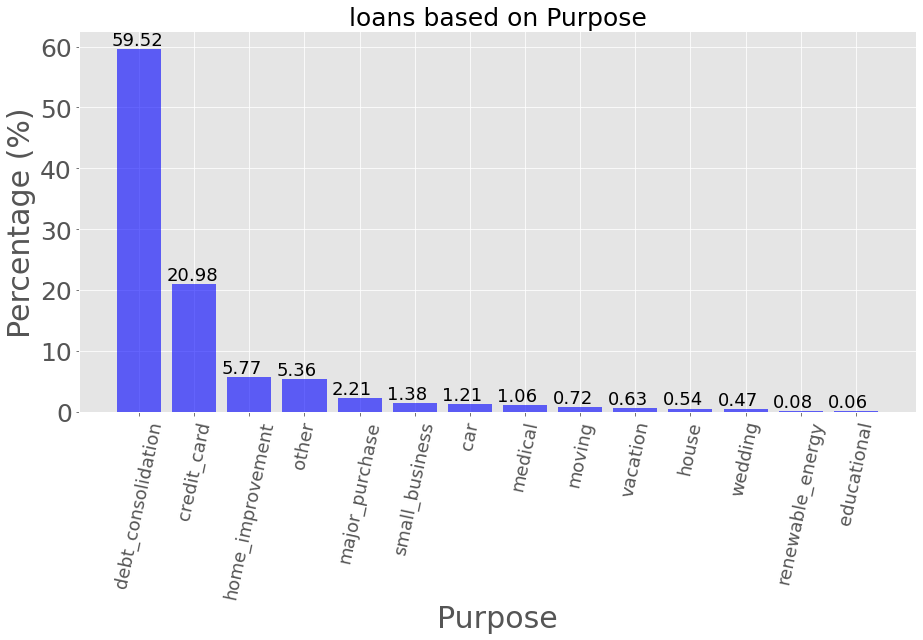

In [60]:
x = data['purpose' ].value_counts().index
y = np.around(data['purpose'].value_counts(normalize=True) * 100, 2)

plt.figure(figsize=(15,7))
plt.bar(x, y, color='b', alpha=0.6) #plot graph of loans proportion based on purpose
plt.xticks(rotation=78, fontsize=18)
plt.yticks(fontsize = 25)
for i in range(len(y)):
        plt.text(i-0.5, y[i], y[i], ha='left', va='bottom', fontsize=18)
        
        
plt.ylabel('Percentage (%)', fontsize =30)
plt.xlabel('Purpose', fontsize = 30)
plt.title('loans based on Purpose', fontsize=25)
plt.show()



In [61]:
charged_off =  data['loan_status'] == 'Charged Off'

co_60_debt = months_60.loc[debt & charged_off]
#charged off 60 mth debt purpose

co_60_events = months_60.loc[events & charged_off]
#charged off 60 mth  events purpose

co_60_necessity = months_60.loc[necessity & charged_off]
#charged off 60 mth  necessity purpose

co_60_business_related = months_60.loc[business_related & charged_off]
#charged off 60 mth  business related purpose

co_60_house = months_60.loc[house & charged_off]
#charged off 60 mth  house purpose

In [62]:
#bins of annual income for debt purpose for 60mth loans
debt_inc_bins_60 = np.rint(bins(x_lower=co_60_debt['annual_inc'].min(),
                                 x_upper=co_60_debt['annual_inc'].max(), bins=25))

#bins of annual income for events purpose for 60mth loans
events_inc_bins_60 = np.rint(bins(x_lower=co_60_events['annual_inc'].min(), 
                                 x_upper=co_60_events['annual_inc'].max(), bins=25))

#bins of annual income for necessity purpose for 60mth loans
necessity_inc_bins_60 = np.rint(bins(x_lower=co_60_necessity['annual_inc'].min(), 
                                 x_upper=co_60_necessity['annual_inc'].max(), bins=25))

#bins of annual income for business related purpose for 60mth loans
business_related_inc_bins_60 = np.rint(bins(x_lower=co_60_business_related['annual_inc'].min(), 
                                 x_upper=co_60_business_related['annual_inc'].max(), bins=25))

#bins of annual income for house purpose for 60mth loans
house_inc_bins_60 = np.rint(bins(x_lower=co_60_house['annual_inc'].min(), 
                                 x_upper=co_60_house['annual_inc'].max(), bins=25))

In [63]:
y_debt_60 = co_bins_portion(debt_inc_bins_60, months_60[debt], 'annual_inc', co_60_debt) 
#% of charged off loans for debt purpose based on bins of annual income

y_events_60 = co_bins_portion(events_inc_bins_60, months_60[events], 'annual_inc', co_60_events) 
#% of charged off loans for events purpose based on bins of annual income

y_necessity_60 = co_bins_portion(necessity_inc_bins_60, months_60[necessity], 'annual_inc', co_60_necessity) 
#% of charged off loans for necessity purpose based on bins of annual income

y_business_related_60 = co_bins_portion(business_related_inc_bins_60, months_60[business_related], 'annual_inc', co_60_business_related) 
#% of charged off loans for business related purpose based on bins of annual income

y_house_60 = co_bins_portion(house_inc_bins_60, months_60[house], 'annual_inc', co_60_house) 
#% of charged off loans for house purpose based on bins of annual income

<ipython-input-63-23f2d680cdd5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_debt_60 = co_bins_portion(debt_inc_bins_60, months_60[debt], 'annual_inc', co_60_debt)
<ipython-input-63-23f2d680cdd5>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_events_60 = co_bins_portion(events_inc_bins_60, months_60[events], 'annual_inc', co_60_events)
<ipython-input-63-23f2d680cdd5>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_necessity_60 = co_bins_portion(necessity_inc_bins_60, months_60[necessity], 'annual_inc', co_60_necessity)
<ipython-input-63-23f2d680cdd5>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_business_related_60 = co_bins_portion(business_related_inc_bins_60, months_60[business_related], 'annual_inc', co_60_business_related)
<ipython-input-63-23f2d680cdd5>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y

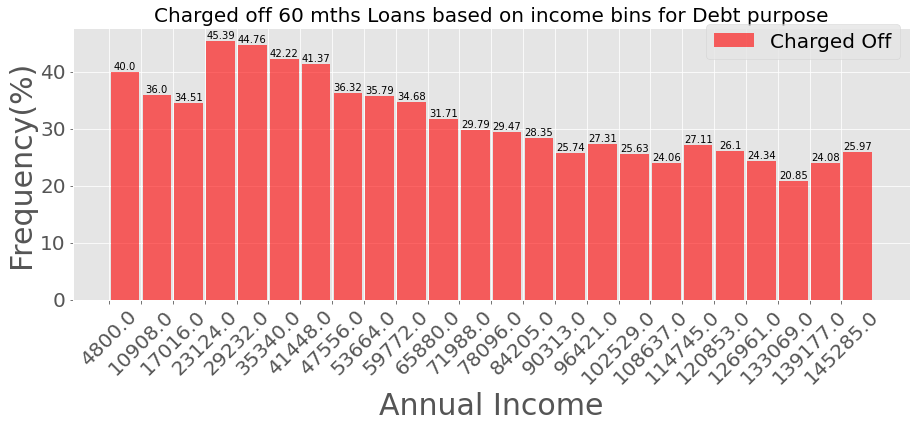

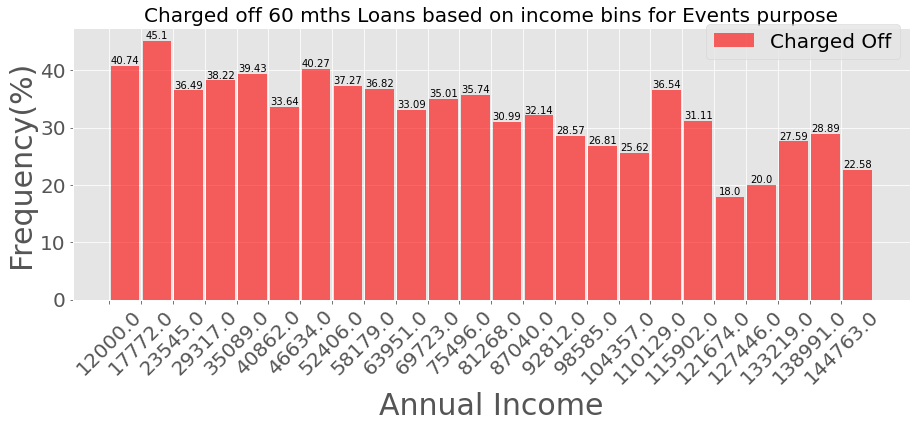

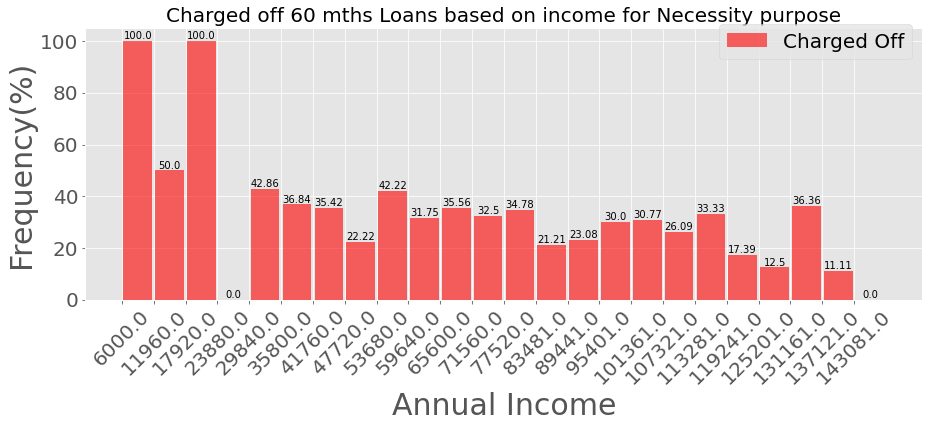

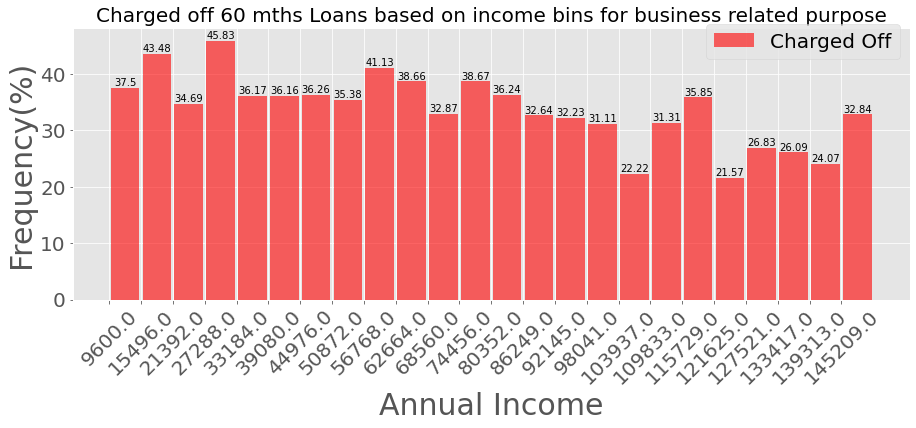

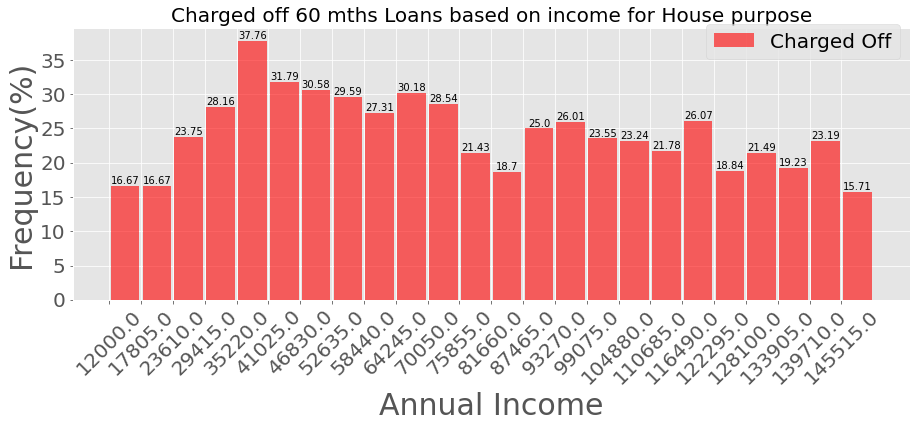

In [64]:

home_inc(debt_inc_bins_60, y_debt_60, 'Charged off 60 mths Loans based on income bins for Debt purpose')
#plots graph of loans based on income bins for debt purpose

home_inc(events_inc_bins_60, y_events_60, 'Charged off 60 mths Loans based on income bins for Events purpose')
#plots graph of loans based on income bins for events purpose


home_inc(necessity_inc_bins_60, y_necessity_60, 'Charged off 60 mths Loans based on income for Necessity purpose')
#plots graph of loans based on income bins for necessity purpose


home_inc(business_related_inc_bins_60, y_business_related_60, 'Charged off 60 mths Loans based on income bins for business related purpose')
#plots graph of loans based on income bins for business related purposes


home_inc(house_inc_bins_60, y_house_60, 'Charged off 60 mths Loans based on income for House purpose')
#plots graph of loans based on income bins for house purpose


# 2.5 Home Ownership 

In [65]:
fp['home_ownership'].value_counts() #fully paid loans based on home ownership

MORTGAGE    150348
RENT        118729
OWN          27951
OTHER           89
NONE            22
Name: home_ownership, dtype: int64

In [66]:
data['home_ownership'].value_counts() #loans based on home ownership

MORTGAGE    181596
RENT        153636
OWN          35340
OTHER          104
NONE            29
Name: home_ownership, dtype: int64

In [67]:
fp_portion_home = np.around( fp['home_ownership'].value_counts() / data['home_ownership'].value_counts() * 100, 2).sort_values()
fp_portion_home #fully paid loans percentage based on home ownership

NONE       75.86
RENT       77.28
OWN        79.09
MORTGAGE   82.79
OTHER      85.58
Name: home_ownership, dtype: float64

In [68]:
co_portion_home = np.around( 100 - fp_portion_home)
co_portion_home #charged off loans percentage based on home ownership

NONE       24.00
RENT       23.00
OWN        21.00
MORTGAGE   17.00
OTHER      14.00
Name: home_ownership, dtype: float64

In [127]:
 months_60['home_ownership'].value_counts()

MORTGAGE    50479
RENT        28826
OWN          7781
NONE            4
OTHER           3
Name: home_ownership, dtype: int64

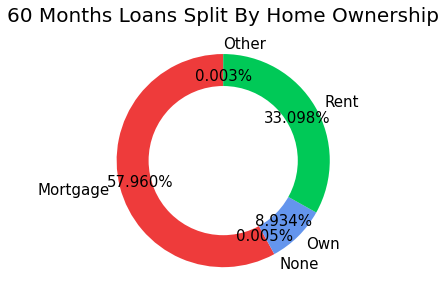

In [70]:
## 60M Loans Split Home Ownership types
y = [50479, 4, 7781, 28826, 3]
x = ['Mortgage', 'None', 'Own', 'Rent', 'Other']

colors = ['#EE3B3B', '#9A32CD', '#6495ED', '#00C957', '#68228B']

plt.pie(y,colors=colors, labels=x, autopct='%1.3f%%', startangle=90, pctdistance=0.8,textprops={'fontsize': 15})
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('60 Months Loans Split By Home Ownership', fontsize=20)

plt.show()

In [72]:
fp_60['home_ownership'].value_counts()

MORTGAGE    36178
RENT        17460
OWN          5196
NONE            3
OTHER           1
Name: home_ownership, dtype: int64

In [73]:
fp_60_portion_home = np.around( fp_60['home_ownership'].value_counts() / months_60['home_ownership'].value_counts() * 100, 2).sort_values()
fp_60_portion_home #fully paid 60 mths loans percentage based on home ownership

OTHER      33.33
RENT       60.57
OWN        66.78
MORTGAGE   71.67
NONE       75.00
Name: home_ownership, dtype: float64

In [74]:
co_60_portion_home = np.around( 100 - fp_60_portion_home)
co_60_portion_home #charged off 60 mths loans percentage based on home ownership

OTHER      67.00
RENT       39.00
OWN        33.00
MORTGAGE   28.00
NONE       25.00
Name: home_ownership, dtype: float64

In [75]:
rent = data['home_ownership'] == 'RENT'

own = (data['home_ownership'] == 'OWN')

mortgage = data['home_ownership'] == 'MORTGAGE'

- we won't look at other and any house types since their values are so small, and their annual income ranges
will have many missing values

In [76]:
charged_off =  data['loan_status'] == 'Charged Off'

co_rent = data.loc[rent & charged_off]

co_own = data.loc[own & charged_off]

co_mortgage = data.loc[mortgage & charged_off]

In [77]:
rent_inc_bins = np.rint(bins(x_lower=co_rent['annual_inc'].min(), #bins of annual income for rent homes
                                 x_upper=co_rent['annual_inc'].max(), bins=25))

own_inc_bins = np.rint(bins(x_lower=co_own['annual_inc'].min(), #bins of annual income for own homes
                                 x_upper=co_own['annual_inc'].max(), bins=25))

mortgage_related_inc_bins = np.rint(bins(x_lower=co_mortgage['annual_inc'].min(), #bins of annual income for mortgage homes
                                 x_upper=co_mortgage['annual_inc'].max(), bins=25))

In [78]:
y_rent = co_bins_portion(rent_inc_bins, data[rent], 'annual_inc', co_rent) 
#% of charged off loans for rent homes based on bins of annual income

y_own = co_bins_portion(own_inc_bins, data[own], 'annual_inc', co_own) 
#% of charged off loans for own homes based on bins of annual income

y_mortgage = co_bins_portion(mortgage_related_inc_bins, data[mortgage], 'annual_inc', co_mortgage)
#% of charged off loans for mortgage homes based on bins of annual income

In [79]:
def barplt(xticks, y1, y2, title, xlabel):
    
    """This function draws bar plots for fully paid and charged off loans based on their purpose"""
    
    plt.style.use("ggplot")

    x = np.arange(len(xticks))  # the label locations
    space = 0.2  # the width of the bars
    width = 0.4

    plt.figure(figsize=(18,7))

    plt.bar(x - space, y1, color='g', width=width, alpha=0.6, label='Fully Paid')
    plt.bar(x + space, y2, color='r', width=width, alpha=0.6, label='Charged Off')

    plt.xticks(x, xticks, fontsize=25, rotation=90)
    plt.yticks(fontsize=25)
    plt.legend()
    plt.title(title, fontsize=25)

    plt.ylabel('Frequency (%)',fontsize=23)
    plt.xlabel(xlabel,fontsize=23)
    plt.legend(fontsize=15, bbox_to_anchor=(1.1,1))

    for i in range(len(y1)):
        plt.text(i, y1[i], y1[i], ha='right', va='bottom', fontsize=15) #adds data labels
    
    for i in range(len(y2)):
        plt.text(i, y2[i], y2[i], ha='left', va='bottom', fontsize=15) #adds data labels
    

    plt.show()
    
    

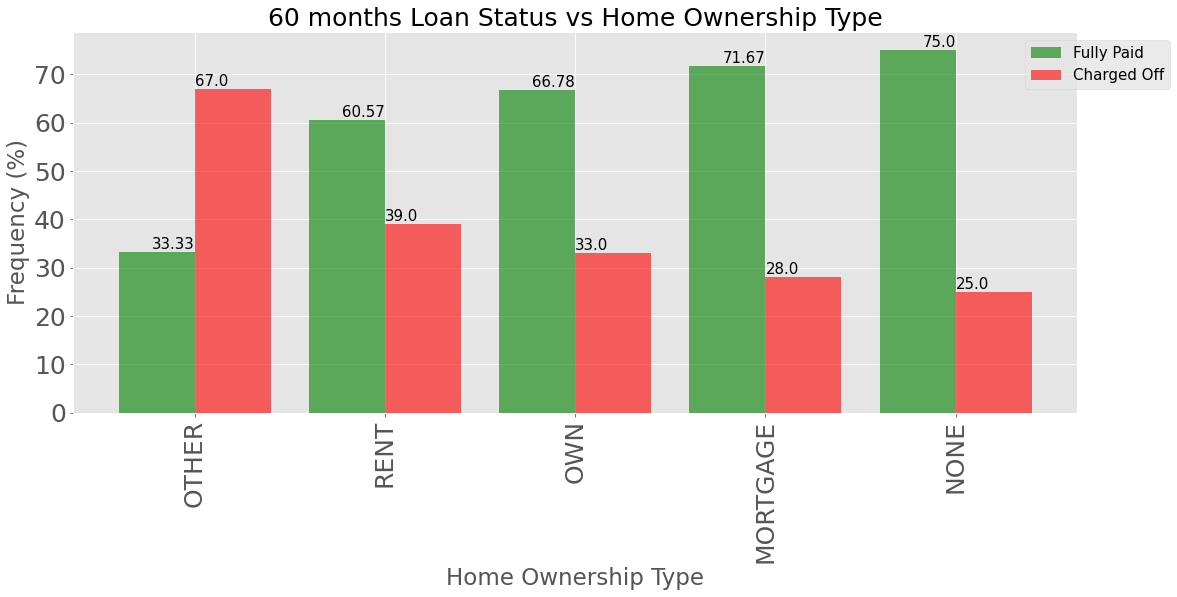

In [80]:

barplt(xticks=fp_60_portion_home.index, y1=fp_60_portion_home, y2=co_60_portion_home, 
title='60 months Loan Status vs Home Ownership Type', xlabel='Home Ownership Type')
#percentage of charged off and fully paid loans based on ownership type


In [81]:
charged_off =  data['loan_status'] == 'Charged Off'

co_rent_60 = months_60.loc[rent & charged_off]

co_own_60 = months_60.loc[own & charged_off]

co_mortgage_60 = months_60.loc[mortgage & charged_off]

In [82]:
fp_60_portion_home = np.around( fp_60['home_ownership'].value_counts() / months_60['home_ownership'].value_counts() * 100, 2).sort_values()
fp_60_portion_home #fully paid loans percentage based on home ownership

OTHER      33.33
RENT       60.57
OWN        66.78
MORTGAGE   71.67
NONE       75.00
Name: home_ownership, dtype: float64

In [83]:
co_60_portion_home = np.around( 100 - fp_60_portion_home)
co_60_portion_home #charged off loans percentage based on home ownership

OTHER      67.00
RENT       39.00
OWN        33.00
MORTGAGE   28.00
NONE       25.00
Name: home_ownership, dtype: float64

In [84]:
rent_inc_bins_60 = np.rint(bins(x_lower=co_rent_60['annual_inc'].min(), #bins of annual income for rent homes
                                 x_upper=co_rent_60['annual_inc'].max(), bins=25))

own_inc_bins_60 = np.rint(bins(x_lower=co_own_60['annual_inc'].min(), #bins of annual income for own homes
                                 x_upper=co_own_60['annual_inc'].max(), bins=25))

mortgage_related_inc_bins_60 = np.rint(bins(x_lower=co_mortgage_60['annual_inc'].min(), #bins of annual income for mortgage homes
                                 x_upper=co_mortgage_60['annual_inc'].max(), bins=25))

In [85]:
y_rent_60 = co_bins_portion(rent_inc_bins_60, months_60[rent], 'annual_inc', co_rent_60) 
#% of charged off loans for rent homes based on bins of annual income

y_own_60 = co_bins_portion(own_inc_bins_60, months_60[own], 'annual_inc', co_own_60) 
#% of charged off loans for own homes based on bins of annual income

y_mortgage_60 = co_bins_portion(mortgage_related_inc_bins_60, months_60[mortgage], 'annual_inc', co_mortgage_60)
#% of charged off loans for mortgage homes based on bins of annual income

<ipython-input-85-b8615c266749>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_rent_60 = co_bins_portion(rent_inc_bins_60, months_60[rent], 'annual_inc', co_rent_60)
<ipython-input-85-b8615c266749>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_own_60 = co_bins_portion(own_inc_bins_60, months_60[own], 'annual_inc', co_own_60)
<ipython-input-85-b8615c266749>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_mortgage_60 = co_bins_portion(mortgage_related_inc_bins_60, months_60[mortgage], 'annual_inc', co_mortgage_60)


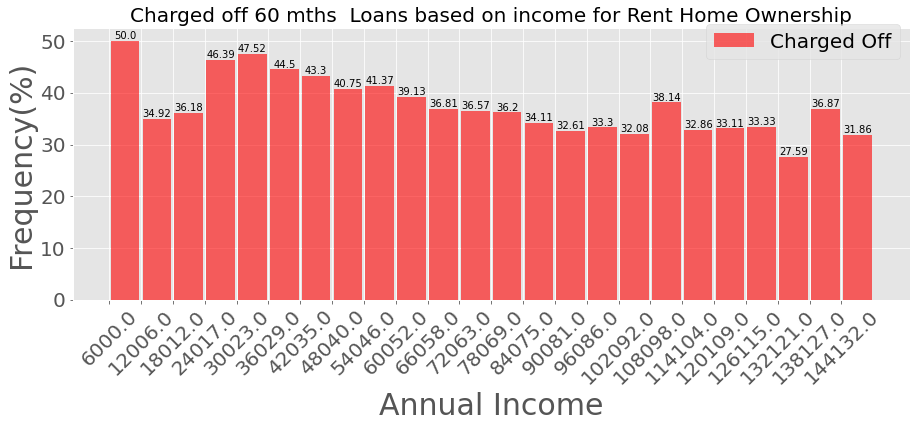

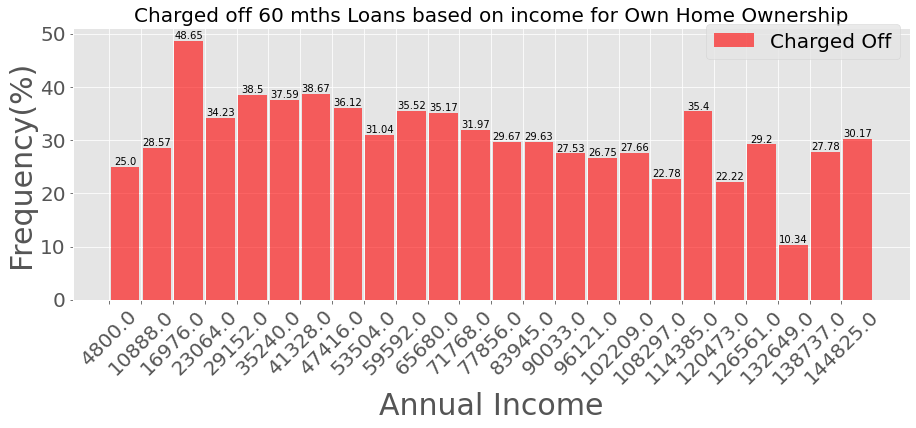

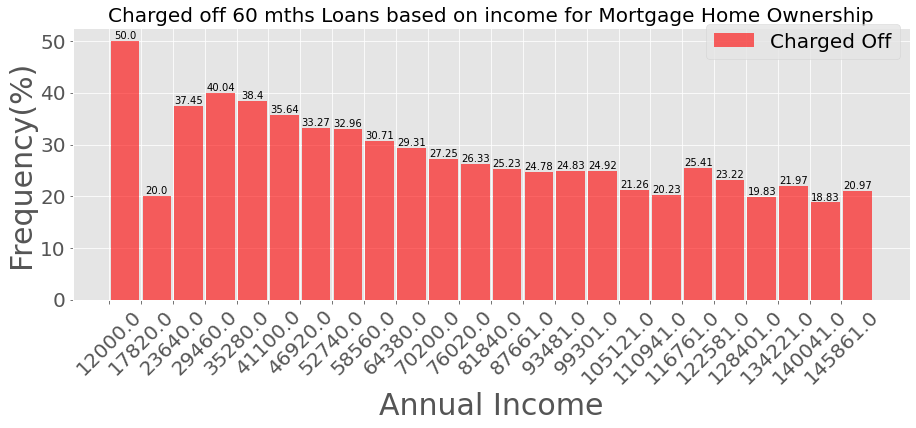

In [86]:
home_inc(rent_inc_bins_60, y_rent_60, 'Charged off 60 mths  Loans based on income for Rent Home Ownership')
#percentage of charged off loans based on Rent home ownership type

home_inc(own_inc_bins_60, y_own_60, 'Charged off 60 mths Loans based on income for Own Home Ownership')
#percentage of charged off loans based on Own home ownership type

home_inc(mortgage_related_inc_bins_60, y_mortgage_60, 'Charged off 60 mths Loans based on income for Mortgage Home Ownership')
#percentage of charged off loans based on Mortgage home ownership type

# Rent Recommendation

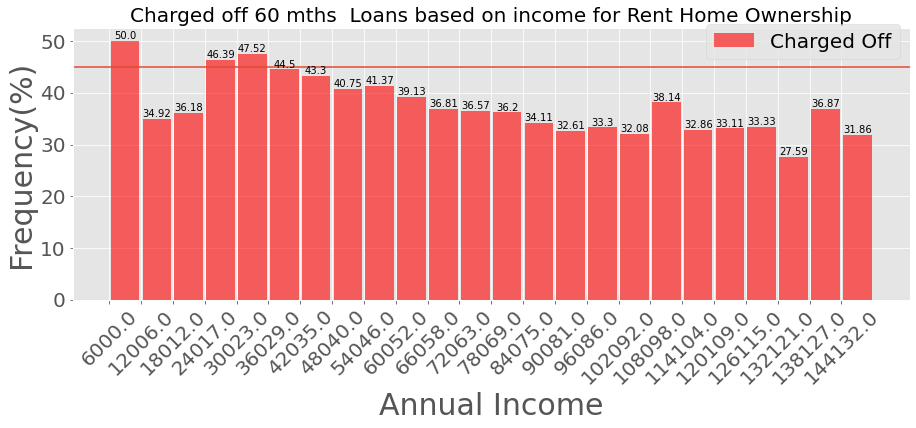

In [87]:
def rent_recco(inc_bins, y_axis, title, limit):
    
    """This function creates a bar graph of charged off loans based on bins of annual income"""
    
    x = np.arange(len(inc_bins)-1)  # the label locations
    space = 0.22# the width of the bars
    width = 0.9
    y = np.array(y_axis)
    plt.figure(figsize=(15,5))
    plt.bar(x, y, color='r', width=width, alpha=0.6, label='Charged Off')
    
    plt.xticks(x-0.5, inc_bins[:-1], fontsize=20, rotation=45)
    plt.yticks(fontsize = 20)
    plt.legend(fontsize=20,bbox_to_anchor=(1, 1.05))
    plt.title(title, fontsize=20)

    for i in range(len(y)):
        plt.text(i, y[i], y[i], ha='center', va='bottom', fontsize=10)

    plt.ylabel('Frequency(%)',fontsize=30)
    plt.xlabel('Annual Income',fontsize=30)
    plt.axhline(y=limit)
    plt.show()
    
    
rent_recco(rent_inc_bins_60, y_rent_60, 'Charged off 60 mths  Loans based on income for Rent Home Ownership', 45)

In [88]:
##calculate average AI of rent and mortgage

rent = data.loc[data['home_ownership'] == 'RENT'] 
                
rent_60m = rent.loc[rent['term'] == ' 60 months']

rent_60m_mean = rent_60m['annual_inc'].mean()

mortgage = data.loc[data['home_ownership'] == 'MORTGAGE'] 
                
mortgage_60m = mortgage.loc[mortgage['term'] == ' 60 months']

mortgage_60m_mean = mortgage_60m['annual_inc'].mean()


print('rent avr AI:', rent_60m_mean, '\n', 'mortgage avr AI:', mortgage_60m_mean )



rent avr AI: 65923.09691944777 
 mortgage avr AI: 78225.5482588799


# 2.6 subgrades

In [89]:
subgrade_order = np.array(['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5',
                     'C1','C2','C3','C4','C5','D1','D2','D3','D4','D5',
                     'E1','E2','E3','E4','E5','F1','F2','F3','F4','F5',
                     'G1','G2','G3','G4','G5'])

In [90]:
co = data[data['loan_status'] == 'Charged Off']
fp = data[data['loan_status'] == 'Fully Paid']

In [91]:
subgrade_fp = (np.around(fp['sub_grade'].value_counts()[subgrade_order] / data['sub_grade'].value_counts()[subgrade_order], 2)* 100)
#percentage of fully paid months loans in order of 'subgrade order'

In [92]:
subgrade_co = np.around( 100 - subgrade_fp, 2) 
#percentage of charged off loans in order of 'subgrade order'

In [93]:
def subgrade(xticks, y1, y2, title, xlabel):
    
    """This function shows graphs of loan status based on subgrades x"""
    
    x = np.arange(len(xticks))  # the label locations
    space = 0.22# the width of the bars
    width = 0.4

    plt.figure(figsize=(18,4))

    plt.bar(x - space, y1, color='g', width=width, alpha=0.6, label='Fully Paid')
    plt.bar(x + space, y2, color='r', width=width, alpha=0.6, label='Charged Off')

    plt.xticks(x, xticks, fontsize=20, rotation=50)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=20)
    plt.title(title, fontsize=20)

    plt.ylabel('Frequency(%)',fontsize=20)
    plt.xlabel(xlabel, fontsize=20)

    plt.show()

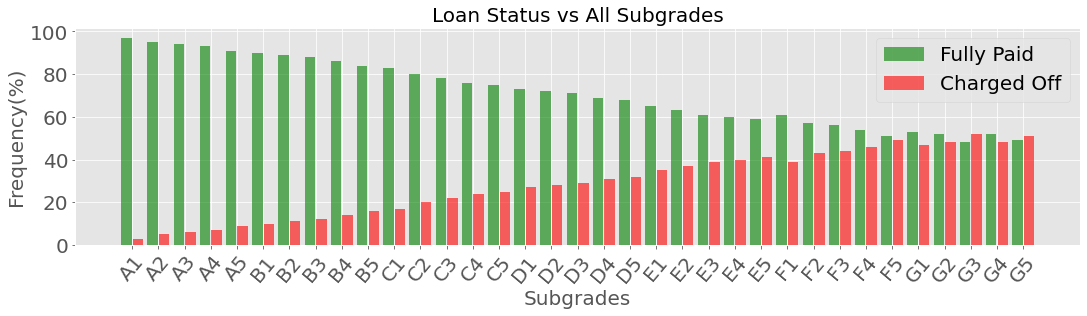

In [94]:
subgrade(xticks=subgrade_order, y1=subgrade_fp,
        y2=subgrade_co, title='Loan Status vs All Subgrades',
        xlabel='Subgrades')

Lets explore **Grade E** onwards

In [95]:
subsetgrade_order_e = np.array(['E1','E2','E3','E4','E5','F1','F2','F3','F4','F5',
                     'G1','G2','G3','G4','G5'])
#order of subgrade e onwards

In [96]:
def subgrade_e(xticks, y1, y2, title):
    
    """This function shows graphs of loan status based on subgrades E"""
    
    x = np.arange(len(xticks))  # the label locations
    space = 0.22# the width of the bars
    width = 0.4

    plt.figure(figsize=(18,7))

    plt.bar(x - space, y1, color='g', width=width, alpha=0.6, label='Fully Paid')
    plt.bar(x + space, y2, color='r', width=width, alpha=0.6, label='Charged Off')
    plt.plot([-1,15],[45,45], color='m', label='45%')
    for i in range(len(y2)):
        plt.text(i, y2[i], y2[i], ha='left', va='bottom', fontsize=13)

    plt.xticks(x, xticks, fontsize=25)
    plt.yticks(fontsize=30)
    plt.legend(fontsize=20,bbox_to_anchor=(1.1, 1.05))
    plt.title(title, fontsize=20)

    plt.ylabel('Frequency(%)',fontsize=25)
    plt.xlabel('Subgrade',fontsize=25)

    plt.show()

In [97]:
#percentage of fully paid loans based on subgrades E onwards
subsetgrade_fp = (np.around(data.loc[data['loan_status'] == 'Fully Paid', 'sub_grade'].value_counts()[subsetgrade_order_e] / data['sub_grade'].value_counts()[subsetgrade_order_e], 2)* 100)

In [98]:
#percentage of charged off loans based on subgrades E onwards
subsetgrade_co = np.around(100 - subsetgrade_fp, 1)

# Subgrade Recommendation

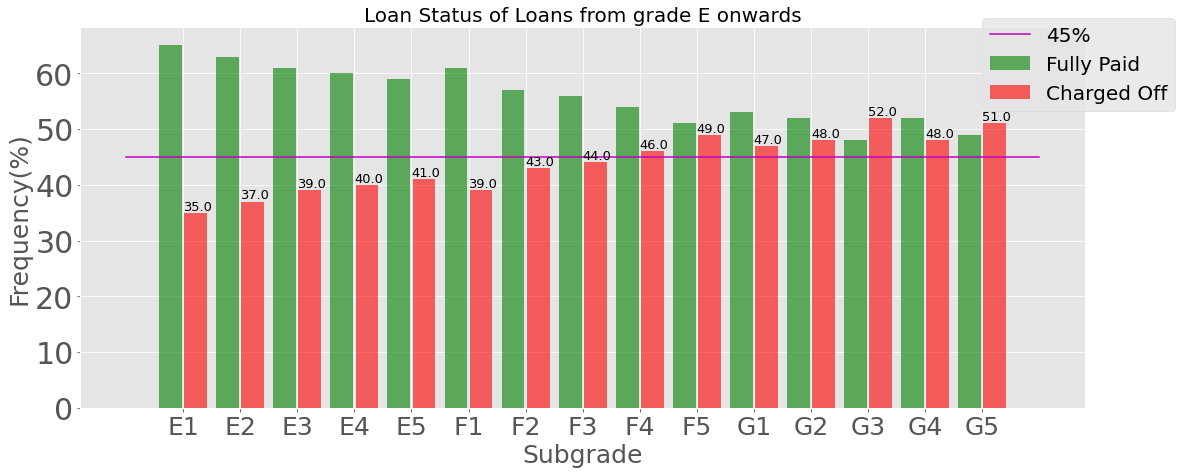

In [99]:
subgrade_e(xticks=subsetgrade_order_e, 
           y1=subsetgrade_fp,
           y2=subsetgrade_co, 
           title='Loan Status of Loans from grade E onwards')

# Appendix: Extra graphs and workings

## DTI

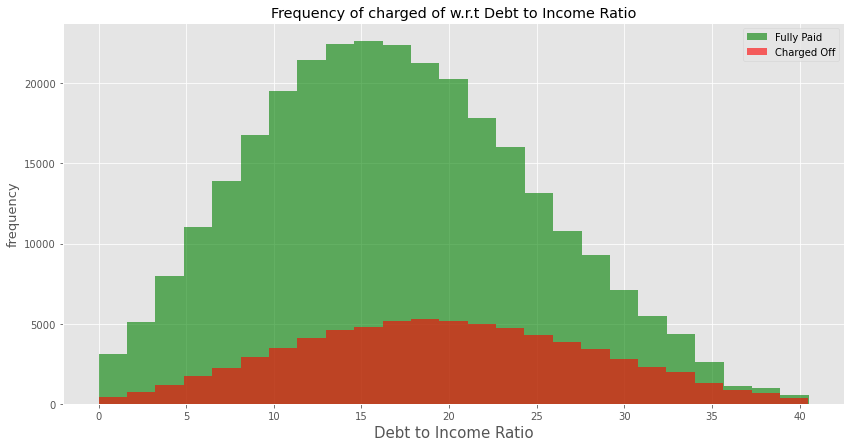

In [100]:
## inconclusive graph on DTI

plt.figure(figsize=(14,7))


plt.hist(fp['dti'], 25, color='g', alpha=0.6, label='Fully Paid')

plt.hist(co['dti'], 25, color= 'r', alpha=0.6, label='Charged Off')

plt.legend()
plt.title('Frequency of charged of w.r.t Debt to Income Ratio')
plt.ylabel('frequency', fontsize=13)
plt.xlabel('Debt to Income Ratio', fontsize=15)
plt.xticks(fontsize=10)

plt.show()

## DTI x Frequency of Charged Off for all loans + 36M

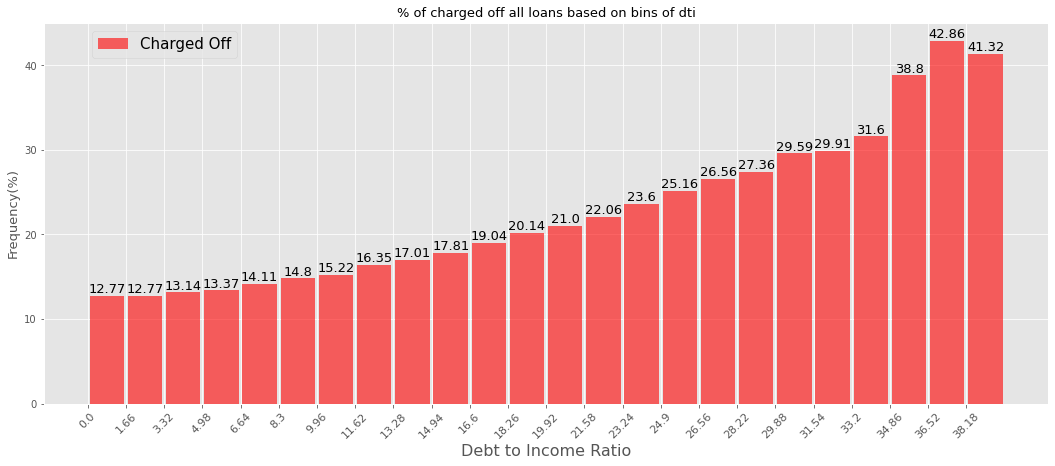

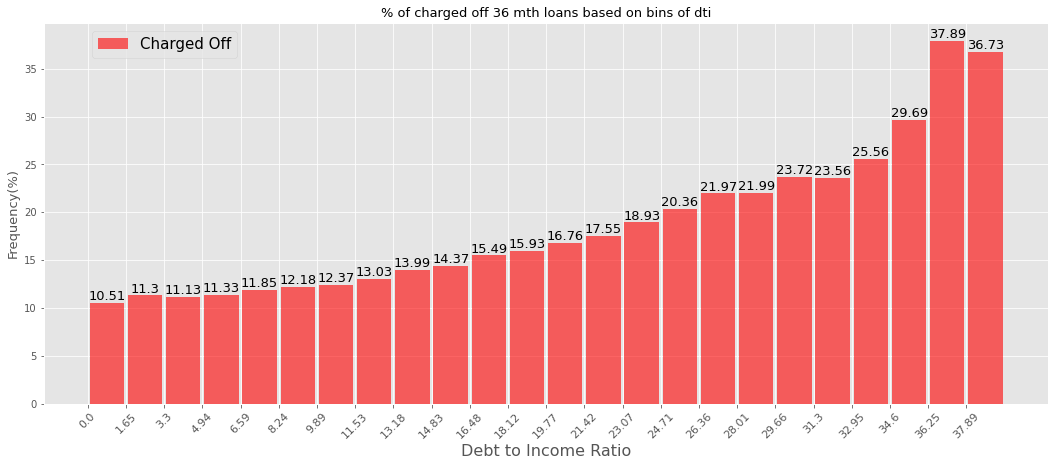

In [101]:
#Percentage of 36 months charged off loans based on bins of dti

dti_bins = bins(x_lower=co['dti'].min(), x_upper=co['dti'].max(), bins=25)
dti_36_bins = bins(x_lower=co_36['dti'].min(), x_upper=co_36['dti'].max(), bins=25)


co_36_dti = co_bins_portion(bins=dti_36_bins, data=months_36, 
                variable='dti', co_data=co_36)
co_36_dti

#Percentage of charged off loans based on bins of dti

co_dti = co_bins_portion(bins=dti_bins, data=data, 
                variable='dti', co_data=co)
co_dti

x = np.arange(len(dti_bins)-1)  # the label locations
space = 0.22# the width of the bars
width = 0.9
y = np.array(co_dti)

plt.figure(figsize=(18,7))

plt.bar(x, y, color='r', width=width, alpha=0.6, label='Charged Off')

plt.xticks(x-0.5, dti_bins[:-1], fontsize=11, rotation=45)
plt.legend(fontsize=15,bbox_to_anchor=(0.2, 1.0))
plt.title('% of charged off all loans based on bins of dti', fontsize=13)

for i in range(len(y)):
    plt.text(i, y[i], y[i], ha='center', va='bottom', fontsize=13)

plt.ylabel('Frequency(%)',fontsize=13)
plt.xlabel('Debt to Income Ratio',fontsize=16)
plt.show()

x = np.arange(len(dti_36_bins)-1)  # the label locations
space = 0.22# the width of the bars
width = 0.9
y = np.array(co_36_dti)

plt.figure(figsize=(18,7))

plt.bar(x, y, color='r', width=width, alpha=0.6, label='Charged Off')

plt.xticks(x-0.5, dti_36_bins[:-1], fontsize=11, rotation=45)
plt.legend(fontsize=15,bbox_to_anchor=(0.2, 1.0))
plt.title('% of charged off 36 mth loans based on bins of dti', fontsize=13)

for i in range(len(y)):
    plt.text(i, y[i], y[i], ha='center', va='bottom', fontsize=13)

plt.ylabel('Frequency(%)',fontsize=13)
plt.xlabel('Debt to Income Ratio',fontsize=16)
plt.show()

# Open Accounts x Frequency of Charged Off for all loans + 36M

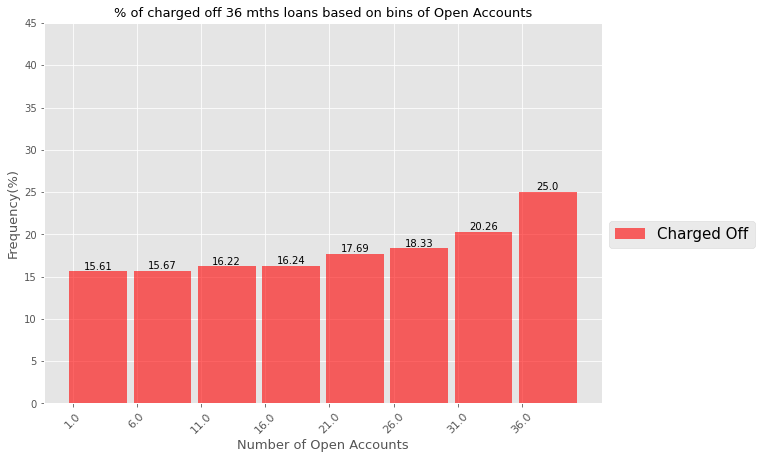

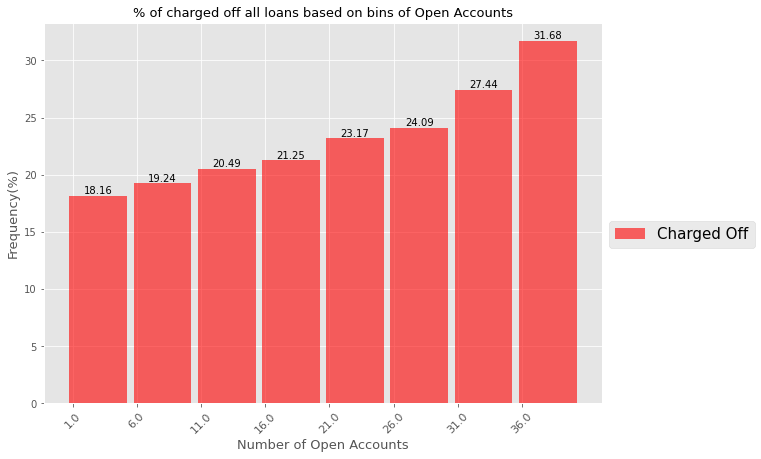

In [102]:
## 36 months
open_acc_valuecount_36 = months_36['open_acc'].value_counts().sort_index()

open_acc_co_valuecount_36 = co['open_acc'].value_counts().sort_index()
#order of percentage of charged off 36 mths loans in ascending order of percentage

open_acc_co_36 = (np.around(open_acc_co_valuecount_36 / open_acc_valuecount_36, 2) * 100).fillna(0)
                  
acc_bins_36 = np.around(bins(x_lower=co_36['open_acc'].min(), x_upper=co_36['open_acc'].max(), bins=9),0)

                  
y_no_bankruptcy_36 = co_bins_portion(acc_bins_36, months_36, 'open_acc', co_36) 
#% of charged off 36 mths loans based on bins of open accounts
                  
x = np.arange(len(acc_bins_36)-1)  # the label locations
space = 0.22# the width of the bars
width = 0.9
y = np.array(y_no_bankruptcy_36)

plt.figure(figsize=(10,7))

plt.bar(x, y, color='r', width=width, alpha=0.6, label='Charged Off') 
#plots graph of percentage of charged off loans based on bins of number of open accounts

plt.xticks(x-0.4, acc_bins[:-1], fontsize=11, rotation=45)
plt.legend(fontsize=15,bbox_to_anchor=(1, 0.5))
plt.title('% of charged off 36 mths loans based on bins of Open Accounts', fontsize=13)

for i in range(len(y)):
    plt.text(i, y[i], y[i], ha='center', va='bottom', fontsize=10)

plt.ylabel('Frequency(%)',fontsize=13)
plt.xlabel('Number of Open Accounts',fontsize=13)
plt.ylim(0,45)
plt.show()


## all loans


y_open_acc = co_bins_portion(acc_bins, data, 'open_acc', co)


x = np.arange(len(acc_bins)-1)  # the label locations
space = 0.22# the width of the bars
width = 0.9
y = np.array(y_open_acc)

plt.figure(figsize=(10,7))

plt.bar(x, y, color='r', width=width, alpha=0.6, label='Charged Off') 
#plots graph of percentage of charged off loans based on bins of number of open accounts

plt.xticks(x-0.4, acc_bins[:-1], fontsize=11, rotation=45)
plt.legend(fontsize=15,bbox_to_anchor=(1, 0.5))
plt.title('% of charged off all loans based on bins of Open Accounts', fontsize=13)

for i in range(len(y)):
    plt.text(i, y[i], y[i], ha='center', va='bottom', fontsize=10)

plt.ylabel('Frequency(%)',fontsize=13)
plt.xlabel('Number of Open Accounts',fontsize=13)
plt.show()

# Annual Income 

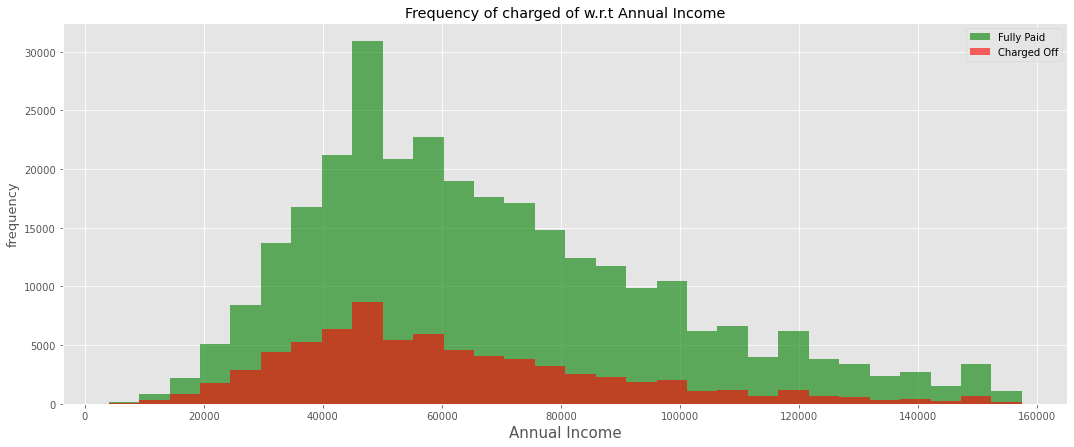

In [103]:
plt.figure(figsize=(18,7))


plt.hist(fp['annual_inc'],30, color='g', alpha=0.6, label='Fully Paid')

plt.hist(co['annual_inc'],30, color= 'r', alpha=0.6, label='Charged Off')

plt.legend()
plt.title('Frequency of charged of w.r.t Annual Income')
plt.ylabel('frequency', fontsize=13)
plt.xlabel('Annual Income', fontsize=15)
plt.xticks(fontsize=10)

plt.show() #this graph is redundant

## Annual Income X Frequency of Charged Off for all loans + 36M

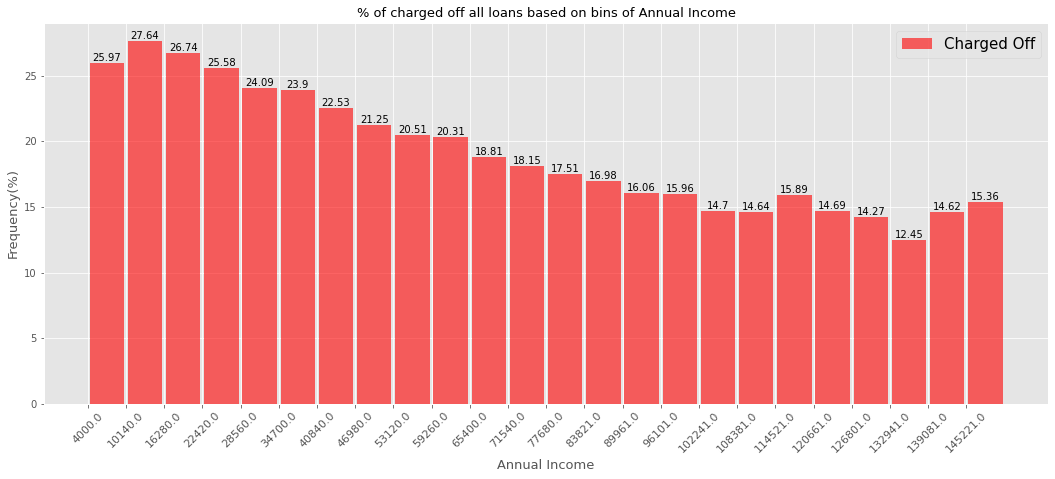

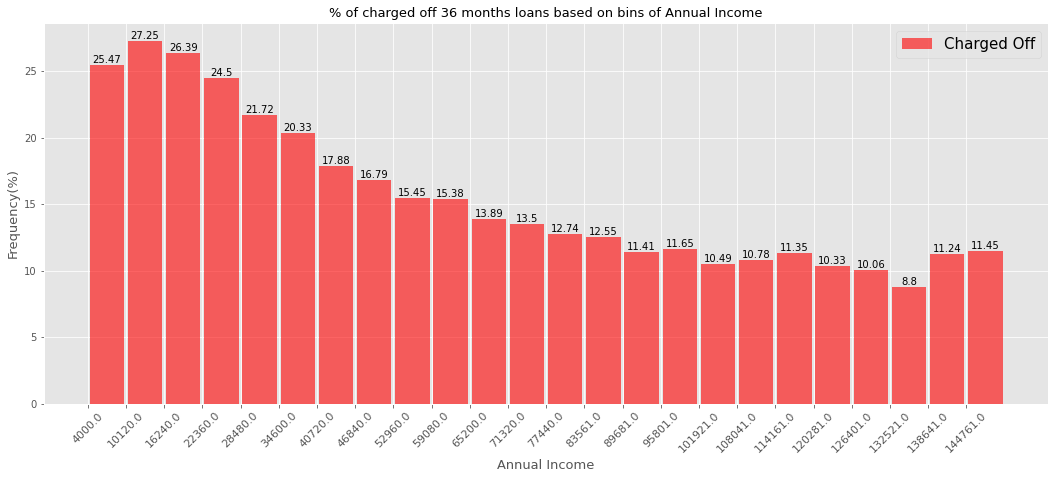

In [104]:
co_bins_portion(bins=inc_bins_60, data=months_60, variable='annual_inc', co_data=co_60)

inc_bins_36 = np.around(bins(x_lower=co_36['annual_inc'].min(), x_upper=co_36['annual_inc'].max(), bins=25), 0)
#Percentage of charged off loans based on bins of annual income
co_ann_inc = co_bins_portion(bins=inc_bins, data=data, 
                variable='annual_inc', co_data=co)

#Percentage of charged off loans based on bins of annual income for 36 months loans
co_ann_inc_36 = co_bins_portion(bins=inc_bins_36, data=months_36, variable='annual_inc', co_data=co_36)



#plot graph for all loans
x = np.arange(len(inc_bins)-1)  # the label locations
space = 0.22# the width of the bars
width = 0.9
y = np.array(co_ann_inc)

plt.figure(figsize=(18,7))

plt.bar(x, y, color='r', width=width, alpha=0.6, label='Charged Off')

plt.xticks(x-0.5, inc_bins[:-1], fontsize=11, rotation=45)
plt.legend(fontsize=15,bbox_to_anchor=(1.0, 1.0))
plt.title('% of charged off all loans based on bins of Annual Income', fontsize=13)

for i in range(len(y)):
    plt.text(i, y[i], y[i], ha='center', va='bottom', fontsize=10)

plt.ylabel('Frequency(%)',fontsize=13)
plt.xlabel('Annual Income',fontsize=13) #convert to whole numbers
plt.show()

#plot graph for 36 months loans
x = np.arange(len(inc_bins_36)-1)  # the label locations
space = 0.22# the width of the bars
width = 0.9
y = np.array(co_ann_inc_36)

plt.figure(figsize=(18,7))

plt.bar(x, y, color='r', width=width, alpha=0.6, label='Charged Off')

plt.xticks(x-0.5, inc_bins_36[:-1], fontsize=11, rotation=45)
plt.legend(fontsize=15,bbox_to_anchor=(1.0, 1.0))
plt.title('% of charged off 36 months loans based on bins of Annual Income', fontsize=13)

for i in range(len(y)):
    plt.text(i, y[i], y[i], ha='center', va='bottom', fontsize=10)

plt.ylabel('Frequency(%)',fontsize=13)
plt.xlabel('Annual Income',fontsize=13) #convert to whole numbers
plt.show()


# Purpose

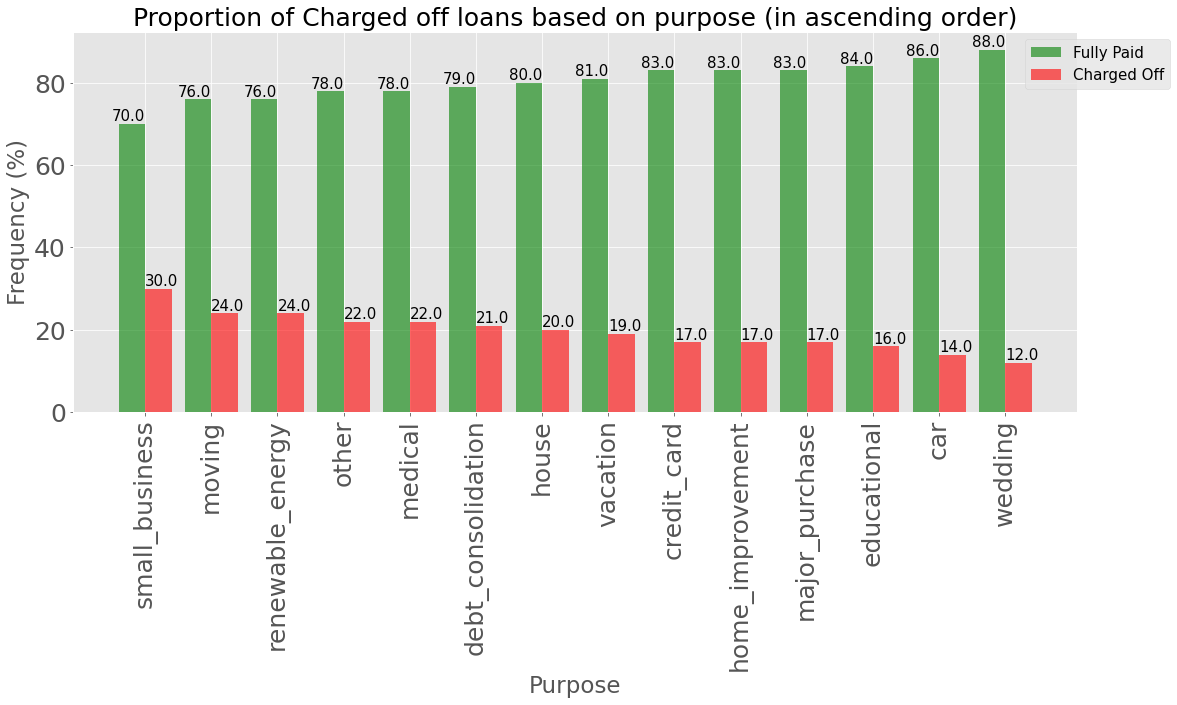

In [105]:
def barplt(xticks, y1, y2, title, xlabel):
    
    """This function draws bar plots for fully paid and charged off loans based on their purpose"""
    
    plt.style.use("ggplot")

    x = np.arange(len(xticks))  # the label locations
    space = 0.2  # the width of the bars
    width = 0.4

    plt.figure(figsize=(18,7))

    plt.bar(x - space, y1, color='g', width=width, alpha=0.6, label='Fully Paid')
    plt.bar(x + space, y2, color='r', width=width, alpha=0.6, label='Charged Off')

    plt.xticks(x, xticks, fontsize=25, rotation=90)
    plt.yticks(fontsize=25)
    plt.legend()
    plt.title(title, fontsize=25)

    plt.ylabel('Frequency (%)',fontsize=23)
    plt.xlabel(xlabel,fontsize=23)
    plt.legend(fontsize=15, bbox_to_anchor=(1.1,1))

    for i in range(len(y1)):
        plt.text(i, y1[i], y1[i], ha='right', va='bottom', fontsize=15) #adds data labels
    
    for i in range(len(y2)):
        plt.text(i, y2[i], y2[i], ha='left', va='bottom', fontsize=15) #adds data labels
    

    plt.show()
    
    
barplt(xticks=purpose_co.index, #plot graph of charged off & fully paid proportion based on purpose
       y1=purpose_fp, 
       y2=purpose_co, 
       title='Proportion of Charged off loans based on purpose (in ascending order)', xlabel='Purpose')

## annual income x frequency of charged off based on all purposes (all loans)

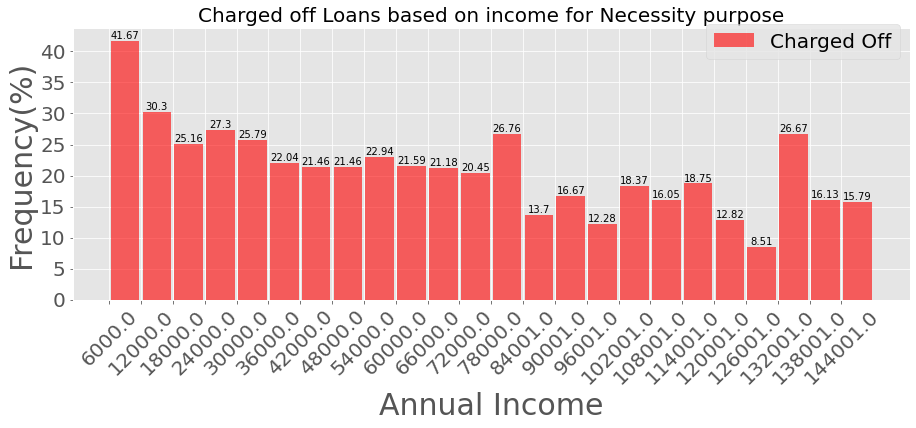

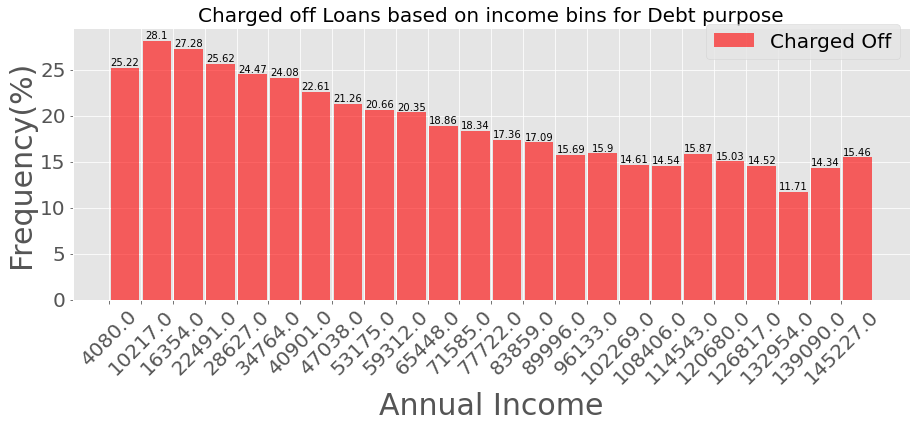

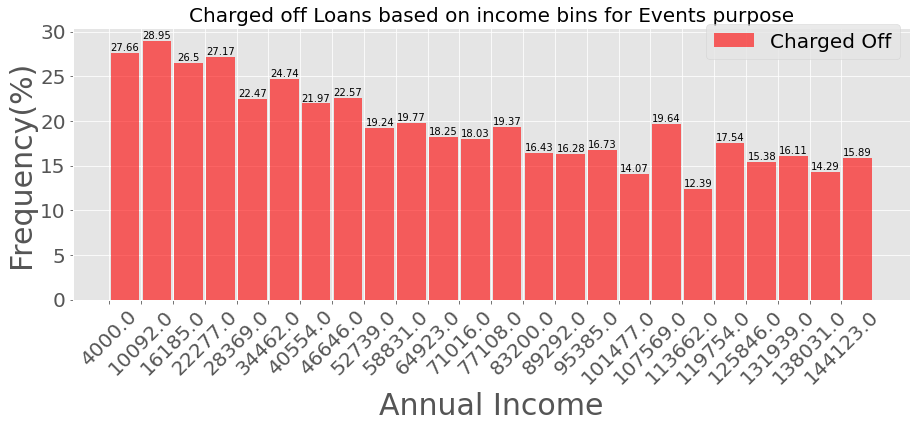

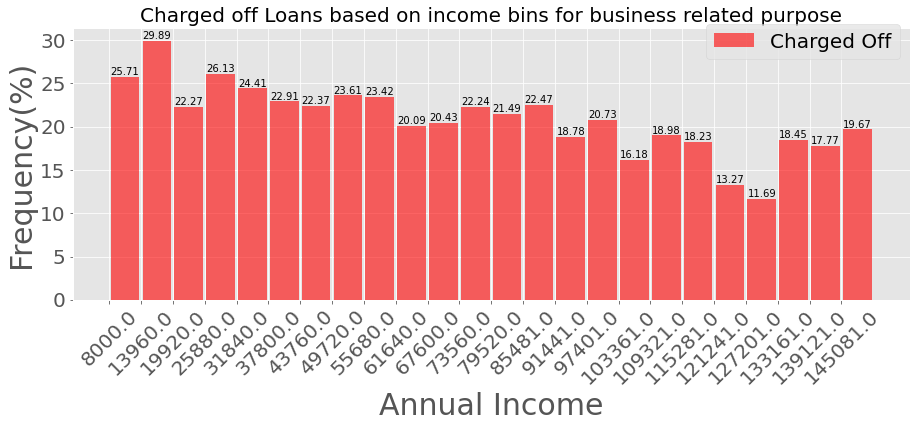

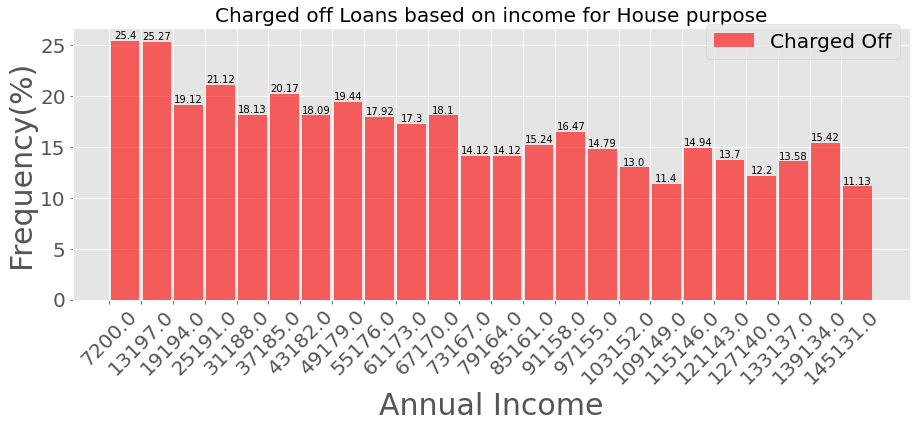

In [106]:
home_inc(necessity_inc_bins, y_necessity, 'Charged off Loans based on income for Necessity purpose')
#plots graph of loans based on income bins for necessity purpose

home_inc(debt_inc_bins, y_debt, 'Charged off Loans based on income bins for Debt purpose')
#plots graph of loans based on income bins for debt purpose

home_inc(events_inc_bins, y_events, 'Charged off Loans based on income bins for Events purpose')
#plots graph of loans based on income bins for events purpose

home_inc(business_related_inc_bins, y_business_related, 'Charged off Loans based on income bins for business related purpose')
#plots graph of loans based on income bins for business related purposes

home_inc(house_inc_bins, y_house, 'Charged off Loans based on income for House purpose')
#plots graph of loans based on income bins for house purpose

## annual income x frequency of charged off based on all purposes (36M)

<ipython-input-107-2b22341b92cd>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_debt_36 = co_bins_portion(debt_inc_bins_36, months_36[debt], 'annual_inc', co_36_debt)
<ipython-input-107-2b22341b92cd>:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_events_36 = co_bins_portion(events_inc_bins_36, months_36[events], 'annual_inc', co_36_events)
<ipython-input-107-2b22341b92cd>:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_necessity_36 = co_bins_portion(necessity_inc_bins_36, months_36[necessity], 'annual_inc', co_36_necessity)
<ipython-input-107-2b22341b92cd>:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_business_related_36 = co_bins_portion(business_related_inc_bins_36, months_36[business_related], 'annual_inc', co_36_business_related)
<ipython-input-107-2b22341b92cd>:51: UserWarning: Boolean Series key will be reindexed to match DataFrame in

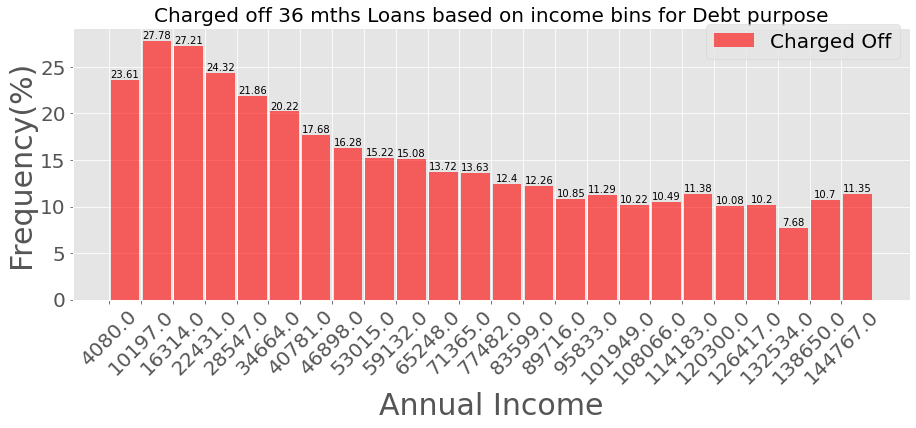

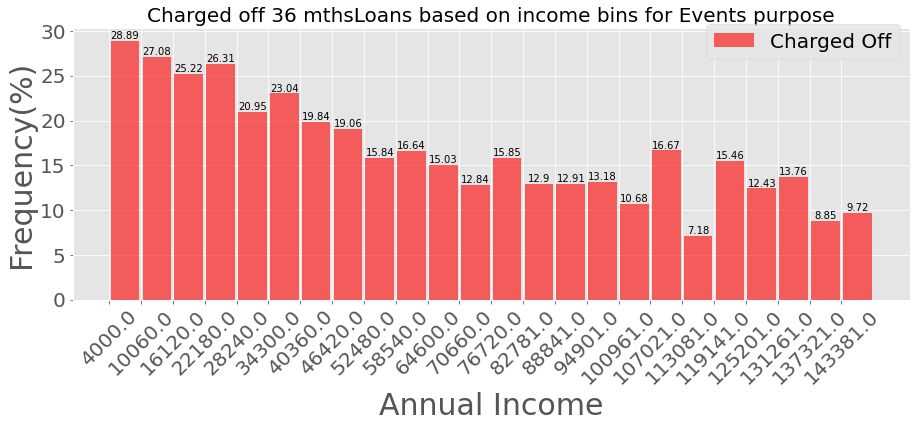

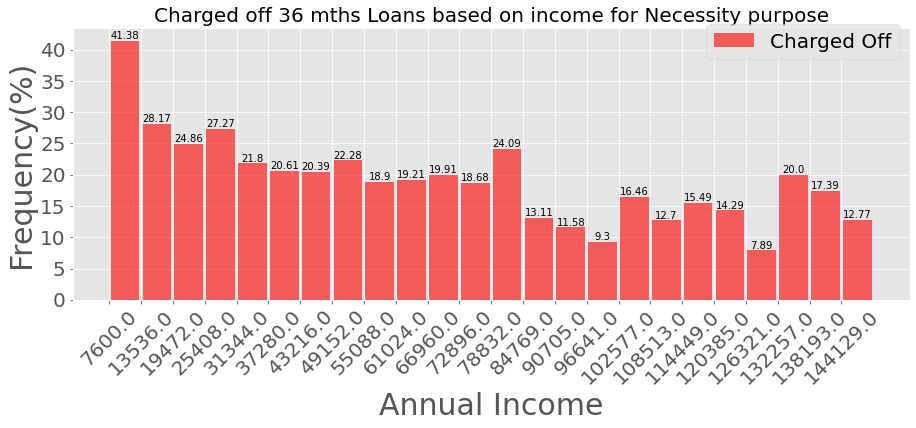

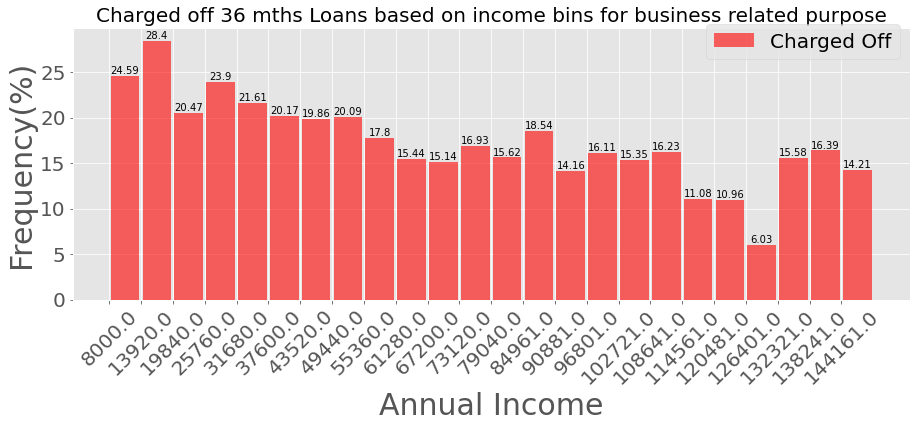

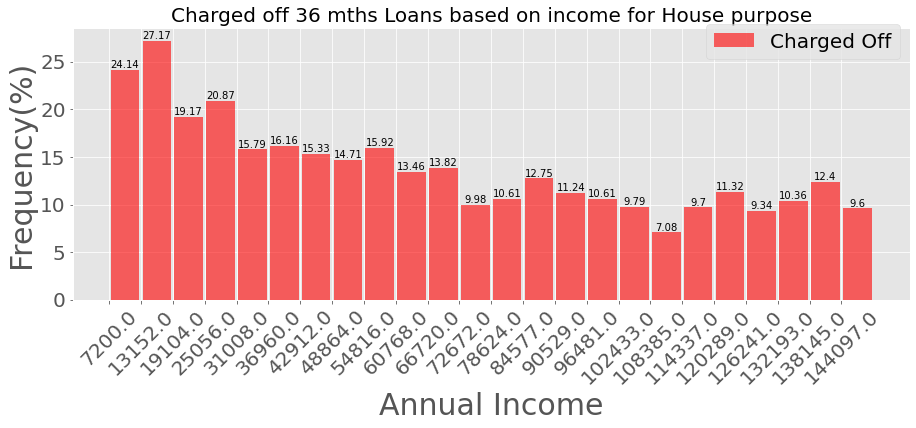

In [107]:
charged_off =  data['loan_status'] == 'Charged Off'

co_36_debt = months_36.loc[debt & charged_off]
#charged off 36 mth debt purpose

co_36_events = months_36.loc[events & charged_off]
#charged off 36 mth  events purpose

co_36_necessity = months_36.loc[necessity & charged_off]
#charged off 36 mth  necessity purpose

co_36_business_related = months_36.loc[business_related & charged_off]
#charged off 36 mth  business related purpose

co_36_house = months_36.loc[house & charged_off]
#charged off 36 mth  house purpose


#bins of annual income for debt purpose for 36mth loans
debt_inc_bins_36 = np.rint(bins(x_lower=co_36_debt['annual_inc'].min(),
                                 x_upper=co_36_debt['annual_inc'].max(), bins=25))

#bins of annual income for events purpose for 36mth loans
events_inc_bins_36 = np.rint(bins(x_lower=co_36_events['annual_inc'].min(), 
                                 x_upper=co_36_events['annual_inc'].max(), bins=25))

#bins of annual income for necessity purpose for 36mth loans
necessity_inc_bins_36 = np.rint(bins(x_lower=co_36_necessity['annual_inc'].min(), 
                                 x_upper=co_36_necessity['annual_inc'].max(), bins=25))

#bins of annual income for business related purpose for 36mth loans
business_related_inc_bins_36 = np.rint(bins(x_lower=co_36_business_related['annual_inc'].min(), 
                                 x_upper=co_36_business_related['annual_inc'].max(), bins=25))

#bins of annual income for house purpose for 36mth loans
house_inc_bins_36 = np.rint(bins(x_lower=co_36_house['annual_inc'].min(), 
                                 x_upper=co_36_house['annual_inc'].max(), bins=25))

y_debt_36 = co_bins_portion(debt_inc_bins_36, months_36[debt], 'annual_inc', co_36_debt) 
#% of charged off loans for debt purpose based on bins of annual income

y_events_36 = co_bins_portion(events_inc_bins_36, months_36[events], 'annual_inc', co_36_events) 
#% of charged off loans for events purpose based on bins of annual income

y_necessity_36 = co_bins_portion(necessity_inc_bins_36, months_36[necessity], 'annual_inc', co_36_necessity) 
#% of charged off loans for necessity purpose based on bins of annual income

y_business_related_36 = co_bins_portion(business_related_inc_bins_36, months_36[business_related], 'annual_inc', co_36_business_related) 
#% of charged off loans for business related purpose based on bins of annual income

y_house_36 = co_bins_portion(house_inc_bins_36, months_36[house], 'annual_inc', co_36_house) 
#% of charged off loans for house purpose based on bins of annual income

home_inc(debt_inc_bins_36, y_debt_36, 'Charged off 36 mths Loans based on income bins for Debt purpose')
#plots graph of loans based on income bins for debt purpose

home_inc(events_inc_bins_36, y_events_36, 'Charged off 36 mthsLoans based on income bins for Events purpose')
#plots graph of loans based on income bins for events purpose

home_inc(necessity_inc_bins_36, y_necessity_36, 'Charged off 36 mths Loans based on income for Necessity purpose')
#plots graph of loans based on income bins for necessity purpose

home_inc(business_related_inc_bins_36, y_business_related_36, 'Charged off 36 mths Loans based on income bins for business related purpose')
#plots graph of loans based on income bins for business related purposes

home_inc(house_inc_bins_36, y_house_36, 'Charged off 36 mths Loans based on income for House purpose')
#plots graph of loans based on income bins for house purpose



# Home ownership (all loans)

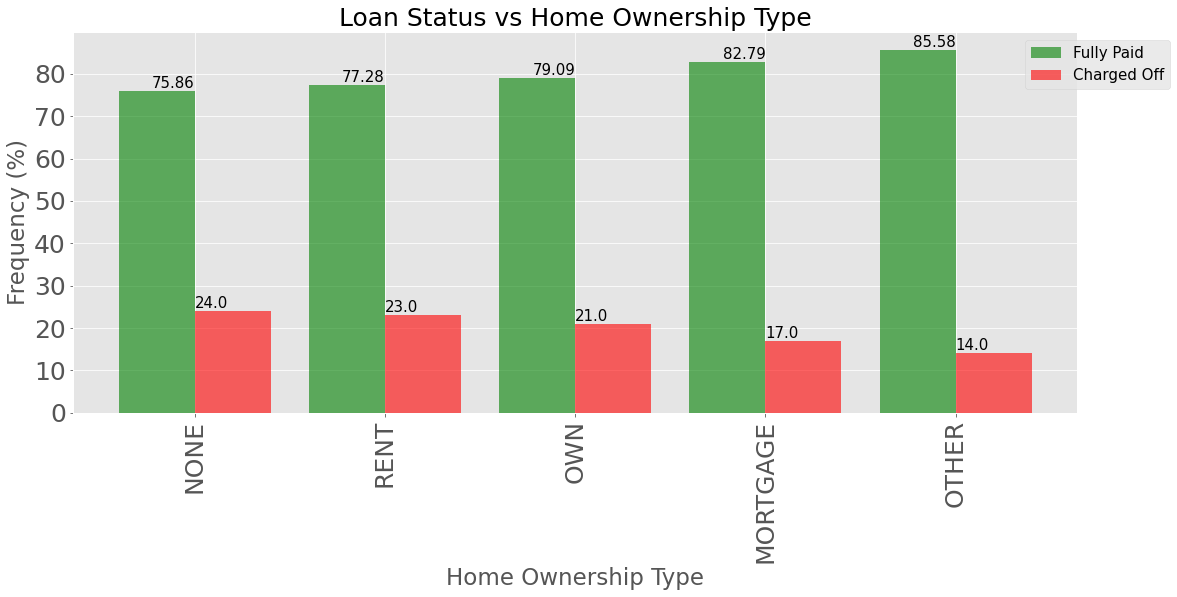

In [108]:
barplt(xticks=fp_portion_home.index, y1=fp_portion_home, y2=co_portion_home, 
title='Loan Status vs Home Ownership Type', xlabel='Home Ownership Type')
#percentage of charged off and fully paid loans based on ownership type

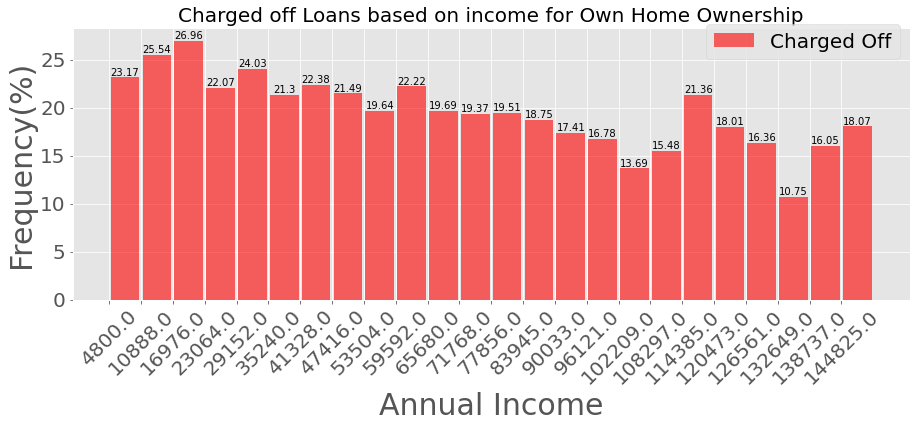

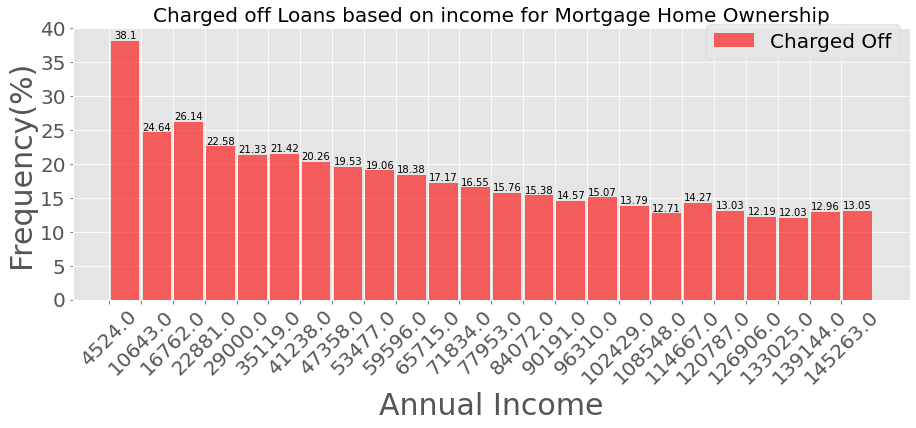

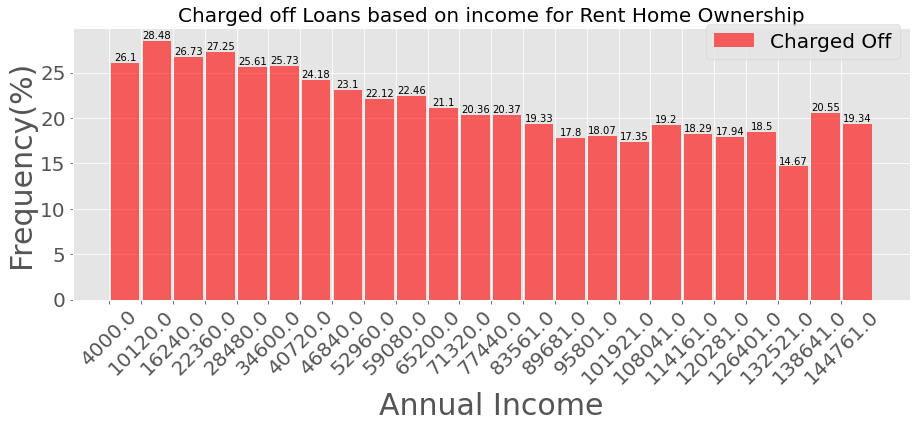

In [109]:
home_inc(own_inc_bins, y_own, 'Charged off Loans based on income for Own Home Ownership')
#percentage of charged off loans based on Own home ownership type

home_inc(mortgage_related_inc_bins, y_mortgage, 'Charged off Loans based on income for Mortgage Home Ownership')
#percentage of charged off loans based on Mortgage home ownership type

home_inc(rent_inc_bins, y_rent, 'Charged off Loans based on income for Rent Home Ownership')
#percentage of charged off loans based on Rent home ownership type

# Bankruptcy (not used in report)

In [110]:
data['pub_rec_bankruptcies'].value_counts()

0.00    327659
1.00     40850
2.00      1738
3.00       335
4.00        79
5.00        31
6.00         7
7.00         4
8.00         2
Name: pub_rec_bankruptcies, dtype: int64

In [111]:
bankruptcies_co = (np.around(co['pub_rec_bankruptcies'].value_counts() / data['pub_rec_bankruptcies'].value_counts(), 2)* 100)
#percentage of charged off loans by bankruptcies

In [112]:
bankruptcies_xticks = data['pub_rec_bankruptcies'].unique()

In [113]:
def bankruptcies(xticks, y, title):
    
    """This function shows graphs of loan status based on number of bankruptcies"""
    
    x = np.arange(len(xticks))  # the label locations
    space = 0.22# the width of the bars
    width = 0.4

    plt.figure(figsize=(18,7))

    plt.bar(x, y, color='g', width=width, alpha=0.6, label='Charged Off')
    plt.plot(x , y , color='r', alpha=0.6, label='Charged Off', marker='s')
    for i in range(len(y)):
        plt.text(i, y[i], y[i], ha='left', va='bottom', fontsize=13)

    plt.xticks(x, xticks, fontsize=11)
    plt.legend(fontsize=15,bbox_to_anchor=(1, 1.05))
    plt.title(title, fontsize=13)

    plt.ylabel('Frequency(%)',fontsize=13)
    plt.xlabel('Number of Bankruptcies',fontsize=13)

    plt.show()

In [114]:
no_bankruptcy = data['pub_rec_bankruptcies'] == 0

one_bankruptcy = data['pub_rec_bankruptcies'] == 1

more_than_one_bankruptcy = data['pub_rec_bankruptcies'] >= 2

In [115]:
charged_off =  data['loan_status'] == 'Charged Off'

co_no_bankruptcy = data.loc[no_bankruptcy & charged_off]
#charged off no bankruptcy

co_one_bankruptcy = data.loc[one_bankruptcy & charged_off]
#charged off 1 bankruptcy

co_more_than_one_bankruptcy = data.loc[more_than_one_bankruptcy & charged_off]
#charged off more than 1 bankruptcies

In [116]:
#bins of annual income for no bankruptcy
no_bankrupt_bins = np.rint(bins(x_lower=co_no_bankruptcy['annual_inc'].min(), 
                                x_upper=co_no_bankruptcy['annual_inc'].max(), bins=25))

#bins of annual income for one bankruptcy
one_bankruptcy_bins = np.rint(bins(x_lower=co_one_bankruptcy['annual_inc'].min(), 
                                 x_upper=co_one_bankruptcy['annual_inc'].max(), bins=25))

#bins of annual income for more than one bankruptcy
more_than_one_bankruptcy_bins = np.rint(bins(x_lower=co_more_than_one_bankruptcy['annual_inc'].min(), 
                                 x_upper=co_more_than_one_bankruptcy['annual_inc'].max(), bins=25))

In [117]:
y_no_bankruptcy = co_bins_portion(no_bankrupt_bins, data[no_bankruptcy], 'annual_inc', co_no_bankruptcy) 
#% of charged off loans for no bankruptcy based on bins of annual income

y_one_bankruptcy = co_bins_portion(one_bankruptcy_bins, data[one_bankruptcy], 'annual_inc', co_one_bankruptcy) 
#% of charged off loans for one bankruptcy based on bins of annual income

y_more_than_one_bankruptcy = co_bins_portion(more_than_one_bankruptcy_bins, data[more_than_one_bankruptcy], 'annual_inc', co_more_than_one_bankruptcy) 
#% of charged off loans for more than one bankruptcy based on bins of annual income

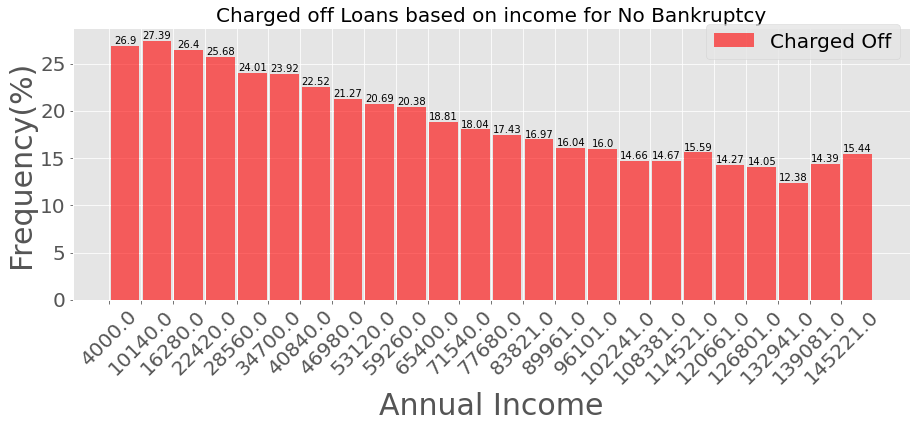

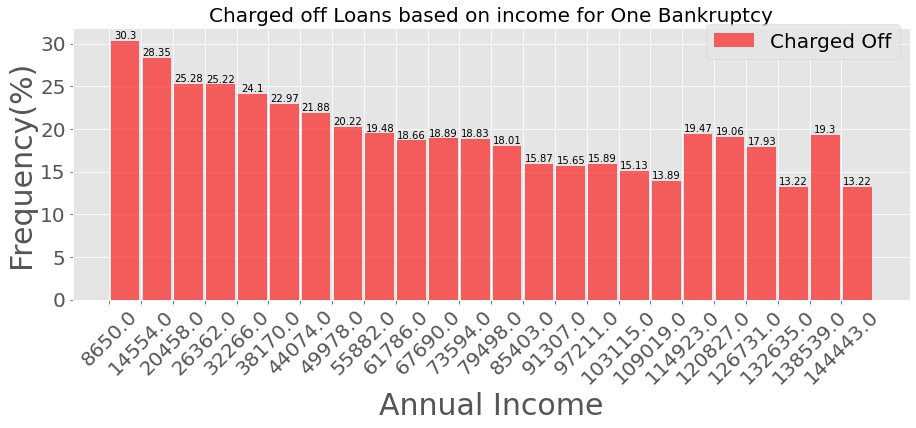

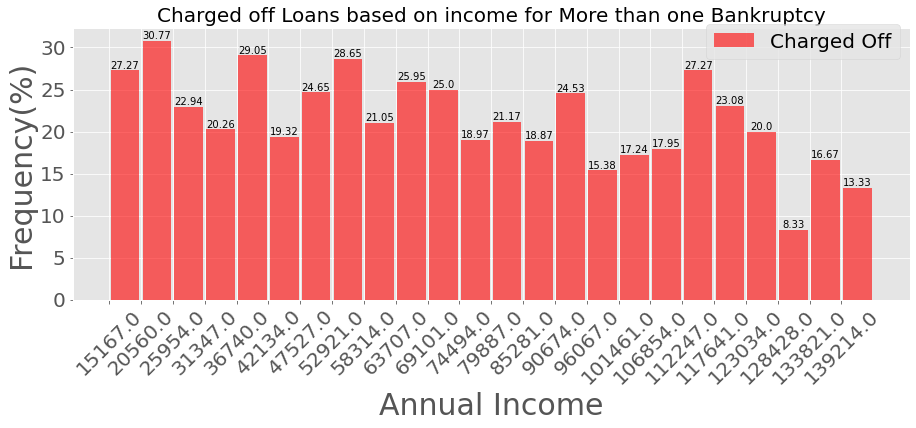

In [118]:
#percentage of charged off loans based on no bankruptcy
home_inc(no_bankrupt_bins, y_no_bankruptcy, 
         'Charged off Loans based on income for No Bankruptcy')

#percentage of charged off loans based on one bankruptcy
home_inc(one_bankruptcy_bins, y_one_bankruptcy, 
         'Charged off Loans based on income for One Bankruptcy')

#percentage of charged off loans based on more than one bankruptcy
home_inc(more_than_one_bankruptcy_bins, y_more_than_one_bankruptcy, 
         'Charged off Loans based on income for More than one Bankruptcy')

In [119]:
charged_off =  data['loan_status'] == 'Charged Off'

co_no_bankruptcy_36 = months_36.loc[no_bankruptcy & charged_off]
#charged off no bankruptcy

co_one_bankruptcy_36 = months_36.loc[one_bankruptcy & charged_off]
#charged off 1 bankruptcy

co_more_than_one_bankruptcy_36 = months_36.loc[more_than_one_bankruptcy & charged_off]
#charged off more than 1 bankruptcies

In [120]:
#bins of annual income for no bankruptcy
no_bankrupt_bins_36 = np.rint(bins(x_lower=co_no_bankruptcy_36['annual_inc'].min(), 
                                x_upper=co_no_bankruptcy_36['annual_inc'].max(), bins=25))

#bins of annual income for one bankruptcy
one_bankruptcy_bins_36 = np.rint(bins(x_lower=co_one_bankruptcy_36['annual_inc'].min(), 
                                 x_upper=co_one_bankruptcy_36['annual_inc'].max(), bins=25))

#bins of annual income for more than one bankruptcy
more_than_one_bankruptcy_bins_36 = np.rint(bins(x_lower=co_more_than_one_bankruptcy_36['annual_inc'].min(), 
                                 x_upper=co_more_than_one_bankruptcy_36['annual_inc'].max(), bins=25))

In [121]:
y_no_bankruptcy_36 = co_bins_portion(no_bankrupt_bins_36, months_36[no_bankruptcy], 'annual_inc', co_no_bankruptcy_36) 
#% of charged off loans for no bankruptcy based on bins of annual income

y_one_bankruptcy_36 = co_bins_portion(one_bankruptcy_bins_36, months_36[one_bankruptcy], 'annual_inc', co_one_bankruptcy_36) 
#% of charged off loans for one bankruptcy based on bins of annual income

y_more_than_one_bankruptcy_36 = co_bins_portion(more_than_one_bankruptcy_bins_36, months_36[more_than_one_bankruptcy], 'annual_inc', co_more_than_one_bankruptcy_36) 
#% of charged off loans for more than one bankruptcy based on bins of annual income

<ipython-input-121-c49db7bca9c5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_no_bankruptcy_36 = co_bins_portion(no_bankrupt_bins_36, months_36[no_bankruptcy], 'annual_inc', co_no_bankruptcy_36)
<ipython-input-121-c49db7bca9c5>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_one_bankruptcy_36 = co_bins_portion(one_bankruptcy_bins_36, months_36[one_bankruptcy], 'annual_inc', co_one_bankruptcy_36)
<ipython-input-121-c49db7bca9c5>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_more_than_one_bankruptcy_36 = co_bins_portion(more_than_one_bankruptcy_bins_36, months_36[more_than_one_bankruptcy], 'annual_inc', co_more_than_one_bankruptcy_36)


In [122]:
charged_off_60 =  data['loan_status'] == 'Charged Off'

co_no_bankruptcy_60 = months_60.loc[no_bankruptcy & charged_off]
#charged off no bankruptcy

co_one_bankruptcy_60 = months_60.loc[one_bankruptcy & charged_off]
#charged off 1 bankruptcy

co_more_than_one_bankruptcy_60 = months_60.loc[more_than_one_bankruptcy & charged_off]
#charged off more than 1 bankruptcies

In [123]:
#bins of annual income for no bankruptcy
no_bankrupt_bins_60 = np.rint(bins(x_lower=co_no_bankruptcy_60['annual_inc'].min(), 
                                x_upper=co_no_bankruptcy_60['annual_inc'].max(), bins=25))

#bins of annual income for one bankruptcy
one_bankruptcy_bins_60 = np.rint(bins(x_lower=co_one_bankruptcy_60['annual_inc'].min(), 
                                 x_upper=co_one_bankruptcy_60['annual_inc'].max(), bins=25))

#bins of annual income for more than one bankruptcy
more_than_one_bankruptcy_bins_60 = np.rint(bins(x_lower=co_more_than_one_bankruptcy_60['annual_inc'].min(), 
                                 x_upper=co_more_than_one_bankruptcy_60['annual_inc'].max(), bins=25))

In [124]:
y_no_bankruptcy_60 = co_bins_portion(no_bankrupt_bins_60, months_60[no_bankruptcy], 'annual_inc', co_no_bankruptcy_60) 
#% of charged off loans for no bankruptcy based on bins of annual income

y_one_bankruptcy_60 = co_bins_portion(one_bankruptcy_bins_60, months_60[one_bankruptcy], 'annual_inc', co_one_bankruptcy_60) 
#% of charged off loans for one bankruptcy based on bins of annual income

y_more_than_one_bankruptcy_60 = co_bins_portion(more_than_one_bankruptcy_bins_60, months_60[more_than_one_bankruptcy], 'annual_inc', co_more_than_one_bankruptcy_60) 
#% of charged off loans for more than one bankruptcy based on bins of annual income

<ipython-input-124-a1517adfc876>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_no_bankruptcy_60 = co_bins_portion(no_bankrupt_bins_60, months_60[no_bankruptcy], 'annual_inc', co_no_bankruptcy_60)
<ipython-input-124-a1517adfc876>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_one_bankruptcy_60 = co_bins_portion(one_bankruptcy_bins_60, months_60[one_bankruptcy], 'annual_inc', co_one_bankruptcy_60)
<ipython-input-124-a1517adfc876>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_more_than_one_bankruptcy_60 = co_bins_portion(more_than_one_bankruptcy_bins_60, months_60[more_than_one_bankruptcy], 'annual_inc', co_more_than_one_bankruptcy_60)


In [125]:
def bankruptcy_inc(inc_bins, y_axis, title, ylim):
    
    """This function creates a bar graph of charged off loans based on bins of annual income"""
    
    x = np.arange(len(inc_bins)-1)  # the label locations
    space = 0.22# the width of the bars
    width = 0.9
    y = np.array(y_axis)
    plt.figure(figsize=(15,5))
    plt.bar(x, y, color='r', width=width, alpha=0.6, label='Charged Off')
    
    plt.xticks(x-0.5, inc_bins[:-1], fontsize=11, rotation=45)
    plt.legend(fontsize=15,bbox_to_anchor=(1, 1.05))
    plt.title(title, fontsize=13)
    plt.ylim(0,ylim)
    
    for i in range(len(y)):
        plt.text(i, y[i], y[i], ha='center', va='bottom', fontsize=10)

    plt.ylabel('Frequency(%)',fontsize=13)
    plt.xlabel('Annual Income')
    plt.show()

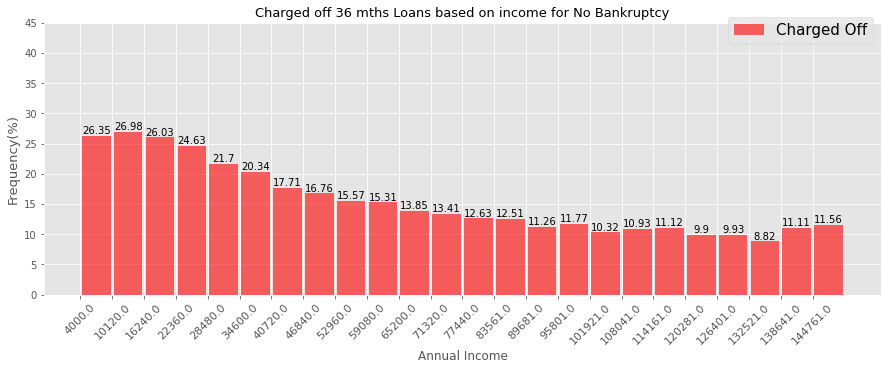

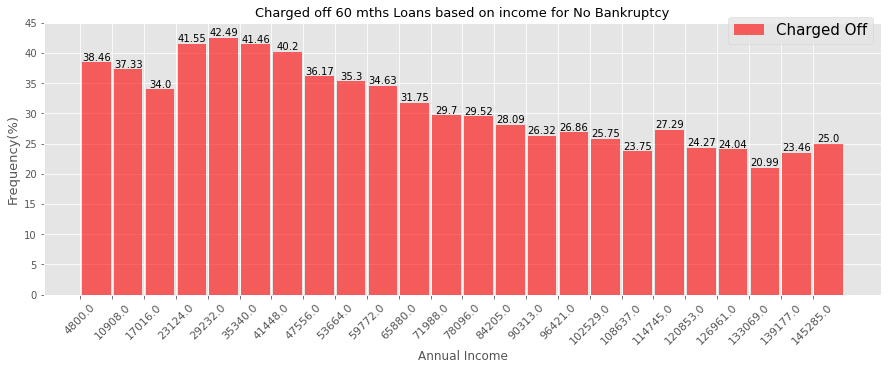

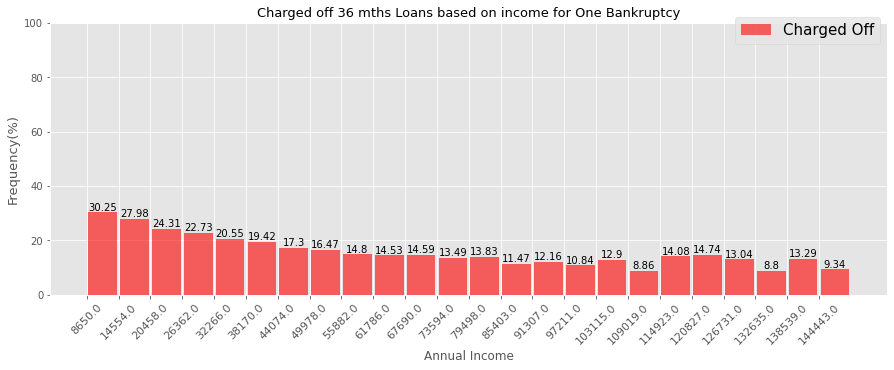

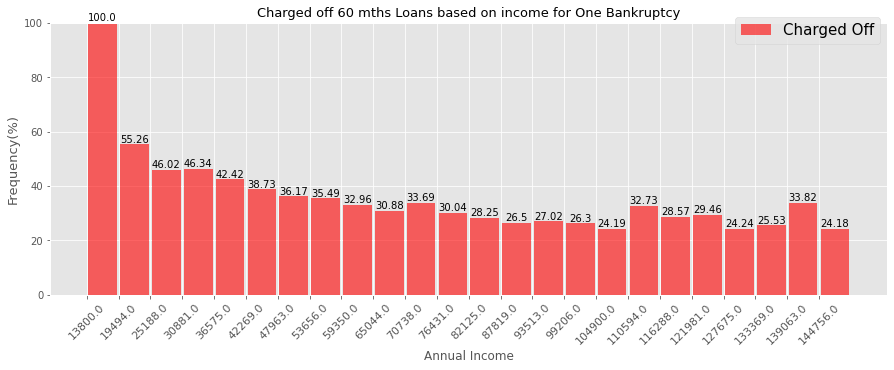

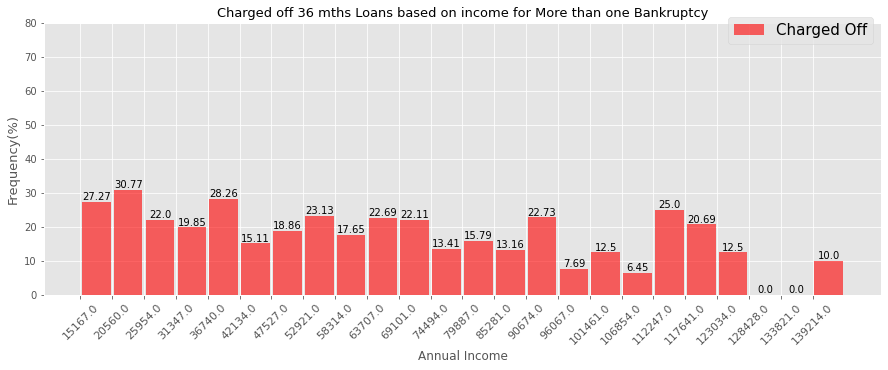

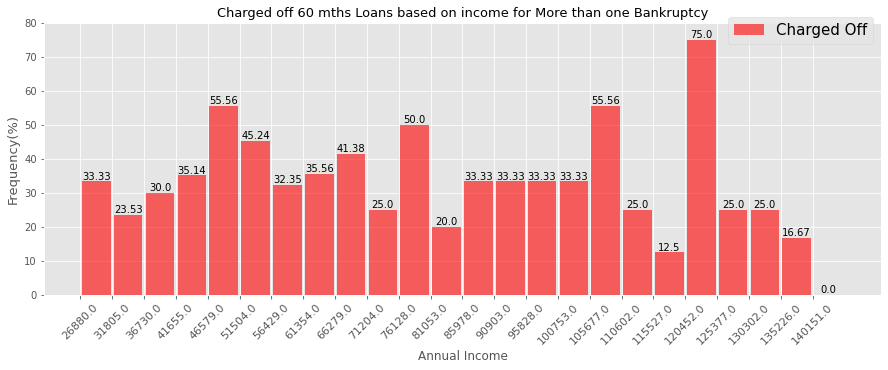

In [126]:
#percentage of charged off 36 mths loans based on no bankruptcy
bankruptcy_inc(no_bankrupt_bins_36, y_no_bankruptcy_36, 
         'Charged off 36 mths Loans based on income for No Bankruptcy', 45)

#percentage of charged off 60 mths loans based on no bankruptcy
bankruptcy_inc(no_bankrupt_bins_60, y_no_bankruptcy_60, 
         'Charged off 60 mths Loans based on income for No Bankruptcy', 45)

#percentage of charged off loans based on one bankruptcy
bankruptcy_inc(one_bankruptcy_bins_36, y_one_bankruptcy_36, 
         'Charged off 36 mths Loans based on income for One Bankruptcy', 100)

#percentage of charged off loans based on one bankruptcy
bankruptcy_inc(one_bankruptcy_bins_60, y_one_bankruptcy_60, 
         'Charged off 60 mths Loans based on income for One Bankruptcy', 100)

#percentage of charged off loans based on more than one bankruptcy
bankruptcy_inc(more_than_one_bankruptcy_bins_36, y_more_than_one_bankruptcy_36, 
         'Charged off 36 mths Loans based on income for More than one Bankruptcy', 80)


#percentage of charged off loans based on more than one bankruptcy
bankruptcy_inc(more_than_one_bankruptcy_bins_60, y_more_than_one_bankruptcy_60, 
         'Charged off 60 mths Loans based on income for More than one Bankruptcy', 80)